# Perturbation Theory

We deal here with the calculation of the second-order corrections to the normal and anomalous Green's functions in the MTI-SC heterostructure, using a perturbative approach in the interacting picture.


## **Tunneling**

In order to evaluate the second order corrections to the MTI Green's functions, we need to make some specific assumption on the spatial dependence of the coupling functions $\gamma_{\sigma \lambda}^{\sigma'}(z,z') \equiv \gamma_{\sigma \lambda}^{\sigma'} f(z,z')$.
In the following, we model the tunneling as
$$
    f(z,z') = \gamma_{\sigma \lambda}^{\sigma'} \,
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  \,,
$$
where the Dirac delta pairs only electrons which are found at the same distance from the interface $z=d$.
Moreover, we assume that the tunneling amplitude decreases away from the interface following a Gaussian distribution with a tunneling length $\lambda_{tun}$.
Obviously, with this assumption, the function $f(z,z') = f(z',z)$ does not depend on the order of the coordinates
$$
\begin{split}
    f(z',z) &= 
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z'-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  = \\[5pt]
    %
    &=
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(2d-z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = \\[5pt]
    %
    &=
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = f(z,z') \,.
\end{split}
$$
where the Dirac delta imposes $z'=2d-z$.


#### <font color='green'> **Tunneling Amplitude** </font> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GreenFunctions_MTI import GFexact
from GreenFunctions_SC import GFnormal, GFnormalMat, GFanomalous, GFanomalousMat

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)


# function for tunneling amplitude 
def spatial_tunneling(z, d, lT):

    # Gaussian tunneling amplitude
    fz = np.exp( -(z-d)**2/(2*lT**2) )

    # return with cut-off at given threshold
    #return fz if fz > threshold else 0.
    return fz

## **Normal Green's Function**


The normal MTI Green's function in the Heisenberg representation
$$
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
    -i \left\langle
    T_t \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
    \right\rangle \,,
$$
can be expressed using interacting picture in perturbative series as
$$
\begin{split}
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} T_t 
	{\psi}_{\sigma\lambda}(zt) 
	{V}(t_1) \dots {V}(t_n)	
	{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,,
\end{split}
$$
and the leading-order correction can be evaluated as
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\sum_{ss't} \sum_{rr'l}
	\int dt_1 \, \int dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	- \\[5pt]
	%
	& -	
        \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't')
	\mathcal{G}^{(0)}_{s' r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, st}(v t_2, w t_1)
	\Bigr\} \,.
\end{split}
$$
The corresponding Feynman diagram is plotted in the picture below.


<p style="text-align:center;">
<img src="Correction_NormalGF.png" width=85% height=85% class="center" />
</p>



Since the Hamiltonian does not depend explicitly on time, we can transform to frequency space through
$$
%
$$
the above equation can be expressed as
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
	\sum_{ss't} \sum_{rr'l}
	& \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	\Bigr\} \,,
\end{split}
$$
and in matrix notation becomes
$$
\boxed{
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    =
    \int dw \, dw' \, dv \, dv' \;
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma(w,w') \,
    \mathcal{G}_{SC}^{(0)}(w',v'; \omega) \,
    \Gamma^{\dagger}(v',v) \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) 
} \,.
$$

In [2]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005
# energies
mu = 0.010; Delta = 0.005; omega = 0.0025


# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=90, kx=kx, ky=ky, L=L, w=omega) for z in zMTI])
# compute SC 
zSC = np.linspace(0, d, 250); gSC = np.array([GFnormal(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega) for z in zSC])

#### <font color='green'> **Green's Functions** </font> 

The unperturbed Green's function in the topological insulator $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$  and in the superconductor $\mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega)$ are plotted below as a function of the out-of-plane coordinate $z$.
In our model, the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) = 0 
    \qquad \text{for} \quad z,z' \leq 0 \; \lor \; z,z' \geq d \,,
$$
while the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega) = 0 
    \qquad \text{for} \quad z-z' \leq d \,.
$$

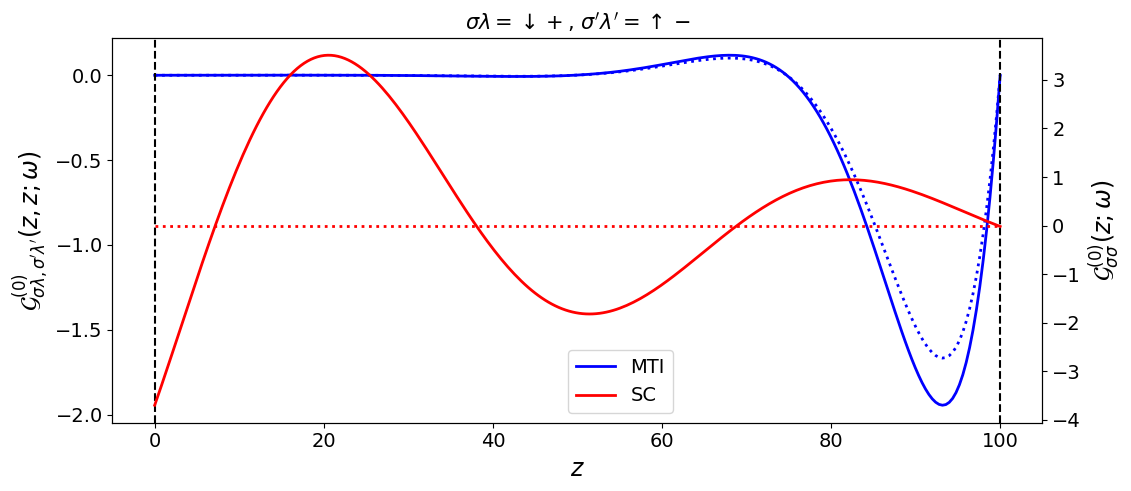

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 1; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, gSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, gSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
#axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
#axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.6, 0.275));

We can now evaluate the second order correction to the normal MTI Green's function
$$
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    =
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(v-w; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) \,.
$$
Using the above assumption for the tunneling function, the second-order correction becomes
$$
\begin{split}
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    &=
    \int dw \, dw' \, dv \, dv' \,
    \delta(w+w'-2d) \tilde{f}(w) \,
    \delta(v+v'-2d) \tilde{f}(v) \times \\[5pt]
    %
    & \qquad \times \, \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma(w,w') \,
    \mathcal{G}_{SC}^{(0)}(w',v'; \omega) \,
    \Gamma^{\dagger}(v',v) \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(2d-w,2d-v; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(v-w; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) \,,
\end{split}
$$
where we used the translational invariance of the superconductor $\mathcal{G}_{SC}^{(0)}(z,z'; \omega) \equiv \mathcal{G}_{SC}^{(0)}(z-z'; \omega)$ and defined the tunneling probability amplitude as 
$$
    \tilde{f}(x) \equiv \exp  \left\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \right\rbrack \,.
$$
It is worth noting that here the integrated variables live in the domain $ 0 \leq w,v \leq d$, since they both refer to electrons in the MTI.




#### **Leading-Order Correction**

Below we compute the following integral for the second order correction to the normal MTI Green's fucntion:
$$
    \boxed{
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega) =
    \int dz_1 \, dz_2 \,
    \tilde{f}(z_1) \, \tilde{f}(z_2) \,
    \mathcal{G}_{MTI}^{(0)}(z, z_1; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(z_2-z_1; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(z_2, z'; \omega)
    } \,.
$$

In [4]:
from scipy.integrate import quad_vec

# define the integrand functions
def G2_integrand(z1, z2, d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # spatial functions
    fz1 = spatial_tunneling(z1, d=d, lT=lT); fz2 = spatial_tunneling(z2, d=d, lT=lT)

    # GMTI(z,w)
    GMTIz = GFexact(d=d, z=z, Z=z1, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GMTI(v,z')
    GMTIZ = GFexact(d=d, z=z2, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # GSC(v-w)
    GSC = GFnormalMat(z=z2-z1, kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return fz1*fz2 * (GMTIz @ Gamma @ GSC @ Gamma.H @ GMTIZ).A



# Second order correction to the normal GF
def G2_montecarlo(d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, Nsamples = 10000, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # normal sampling
    #z1_samples = np.random.uniform(0., d, Nsamples); z2_samples = np.random.uniform(0., d, Nsamples)

    # importance sampling
    z1 = np.random.normal(loc=d, scale=lT, size=Nsamples); z2 = np.random.normal(loc=d, scale=lT, size=Nsamples);
    # restrict to values in [0,d]
    z1_samples = np.where(z1 > d, 2*d-z1, z1); z2_samples = np.where(z2 > d, 2*d-z2, z2)
    
    # importance sampling function 
    qi = lambda x1,x2: spatial_tunneling(x1,d,lT)*spatial_tunneling(x2,d,lT)
    
    # matrix for mean values
    fsum = np.zeros((4,4), dtype='complex')

    # loop over samples
    for (z1,z2) in zip(z1_samples, z2_samples):

        # compute mean of fwv function
        fsum += G2_integrand(z1, z2, d=d, z=z, Z=Z, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)/qi(z1,z2)

    return pow(d,2)*fsum/float(Nsamples)


# Second order correction to the normal GF with scipy quad_vec
def G2_quad_vec(d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, Nint=100, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # define integrand function 
    fintegrand = lambda z1, z2: G2_integrand(z1, z2, d=d, z=z, Z=Z, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # compute double integral
    return quad_vec(lambda z1 : quad_vec(lambda z2: fintegrand(z1, z2), 0., d)[0], 0., d)[0]

## **Second-Order Term**

In [5]:
from Reading import Read_GreenFunction

# parameters
d = 100.; kx = 0.002; ky = 0.006; L = 0.
# tunneling parameters
lT = 0.05*d; gamma = 0.001
# energies
mu = 0.010; Delta = 0.005; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])


# G2 with z=z'
lattice1, G2_zZ = Read_GreenFunction('L-0/Importance-50000_no-gamma/G2-zZ.out')
# corresponding G0
G0_zZ = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=omega) for z in lattice1])

# G2 with z' fixed
lattice2, G2_Zfixed = Read_GreenFunction('L-0/Importance-50000_no-gamma/G2-Z-fixed.out')
# G2 with z fixed
lattice3, G2_zfixed = Read_GreenFunction('L-0/Importance-50000_no-gamma/G2-z-fixed.out', zIdx=1)

### Green's Function for $z=z'$

#### <font color='green'> **Real Part** </font> 

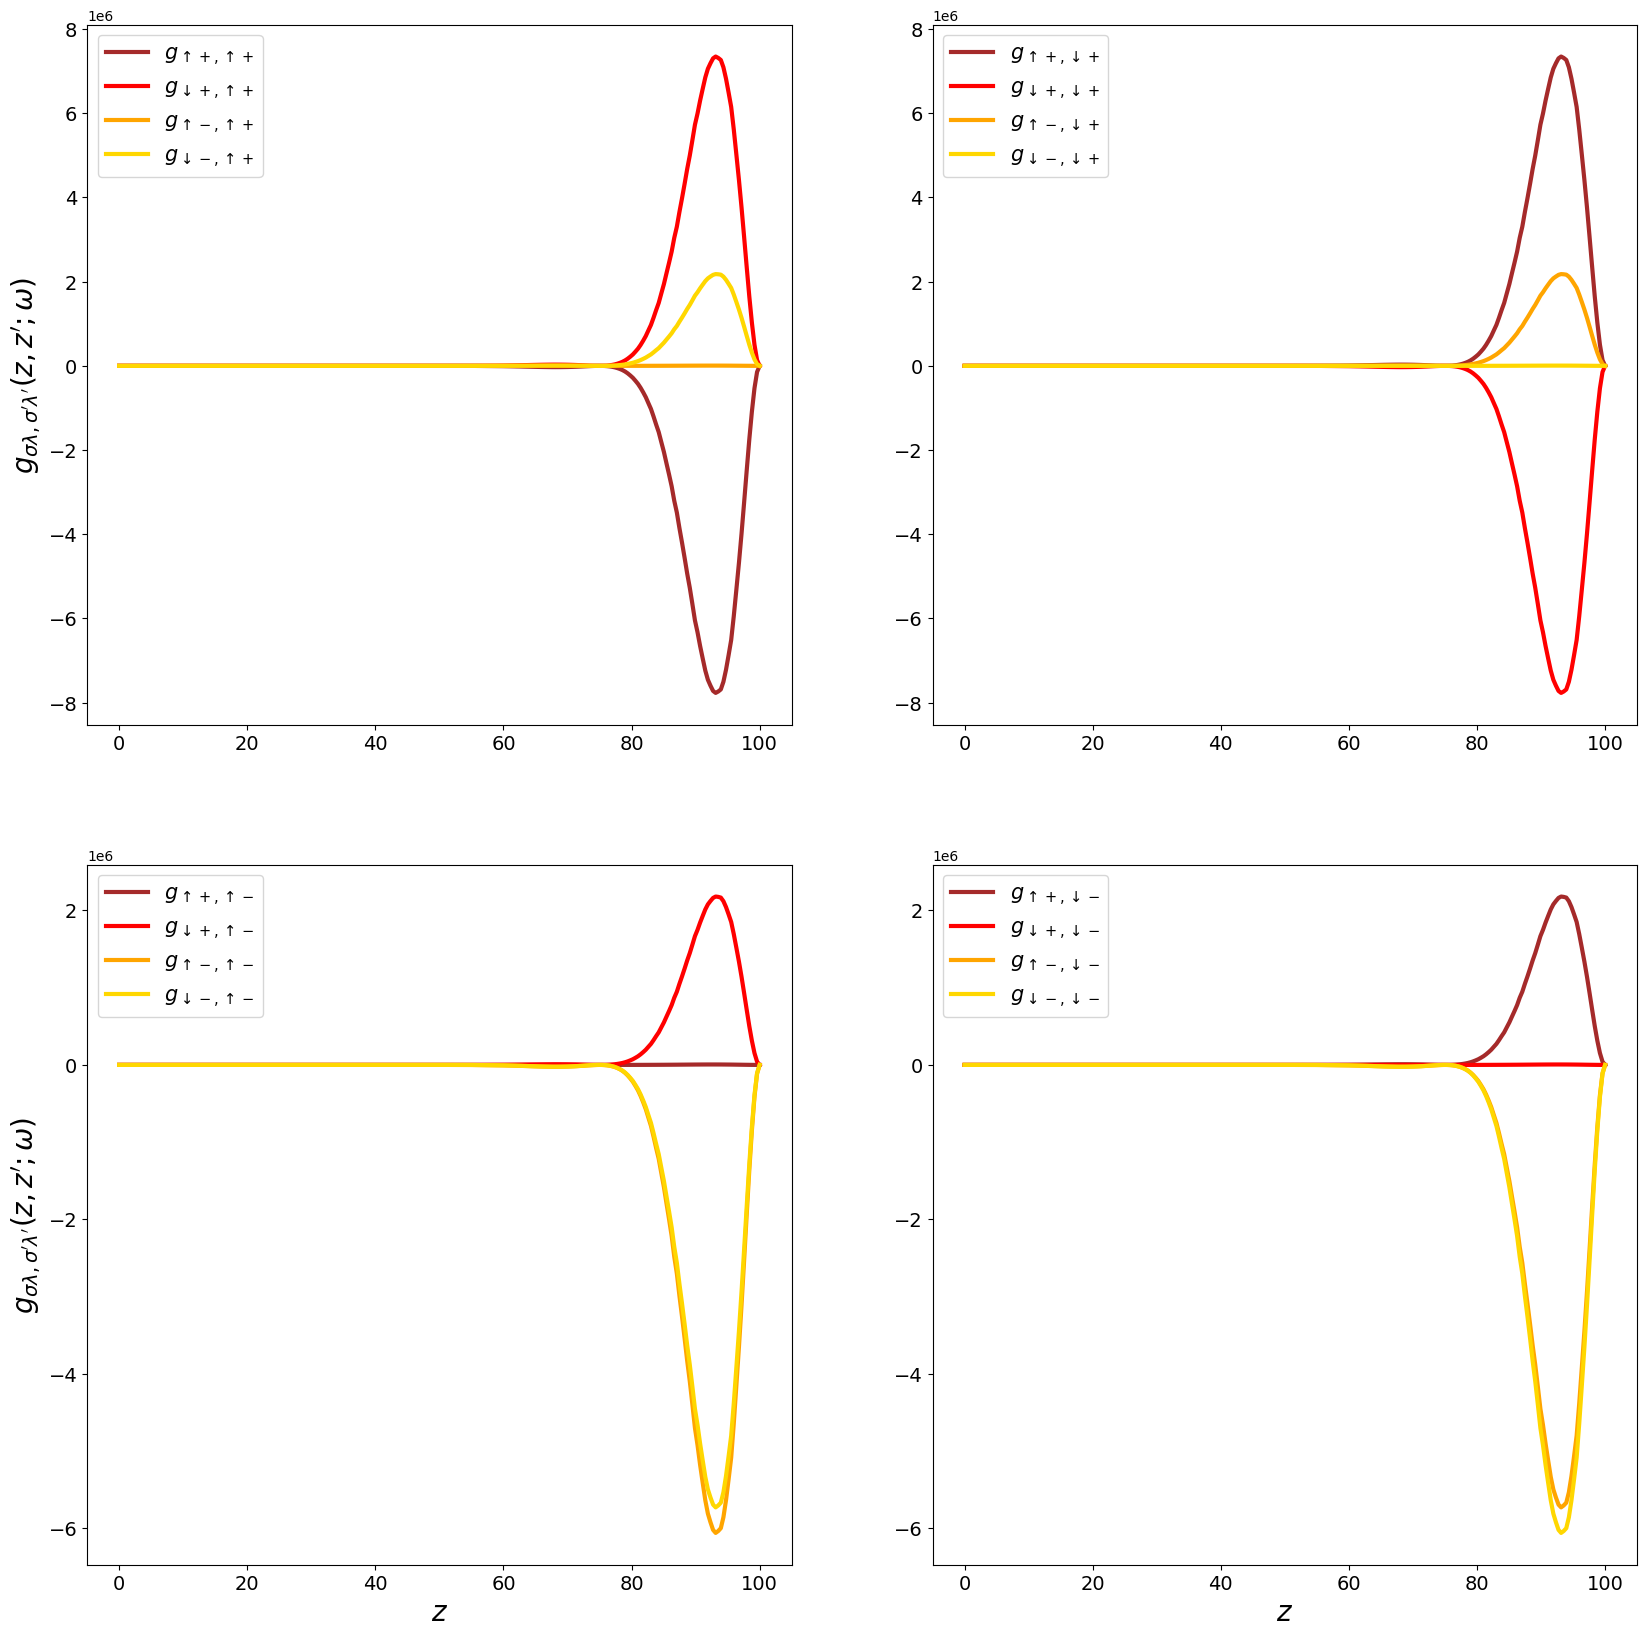

In [6]:
# select lattice
lattice = lattice1
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_zZ[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=3, label=labels[irow][icol])
        # plot the unperturbed GF
        #axs[iPic][jPic].plot(lattice, [G0_zZ[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], ls=':', lw=3)

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

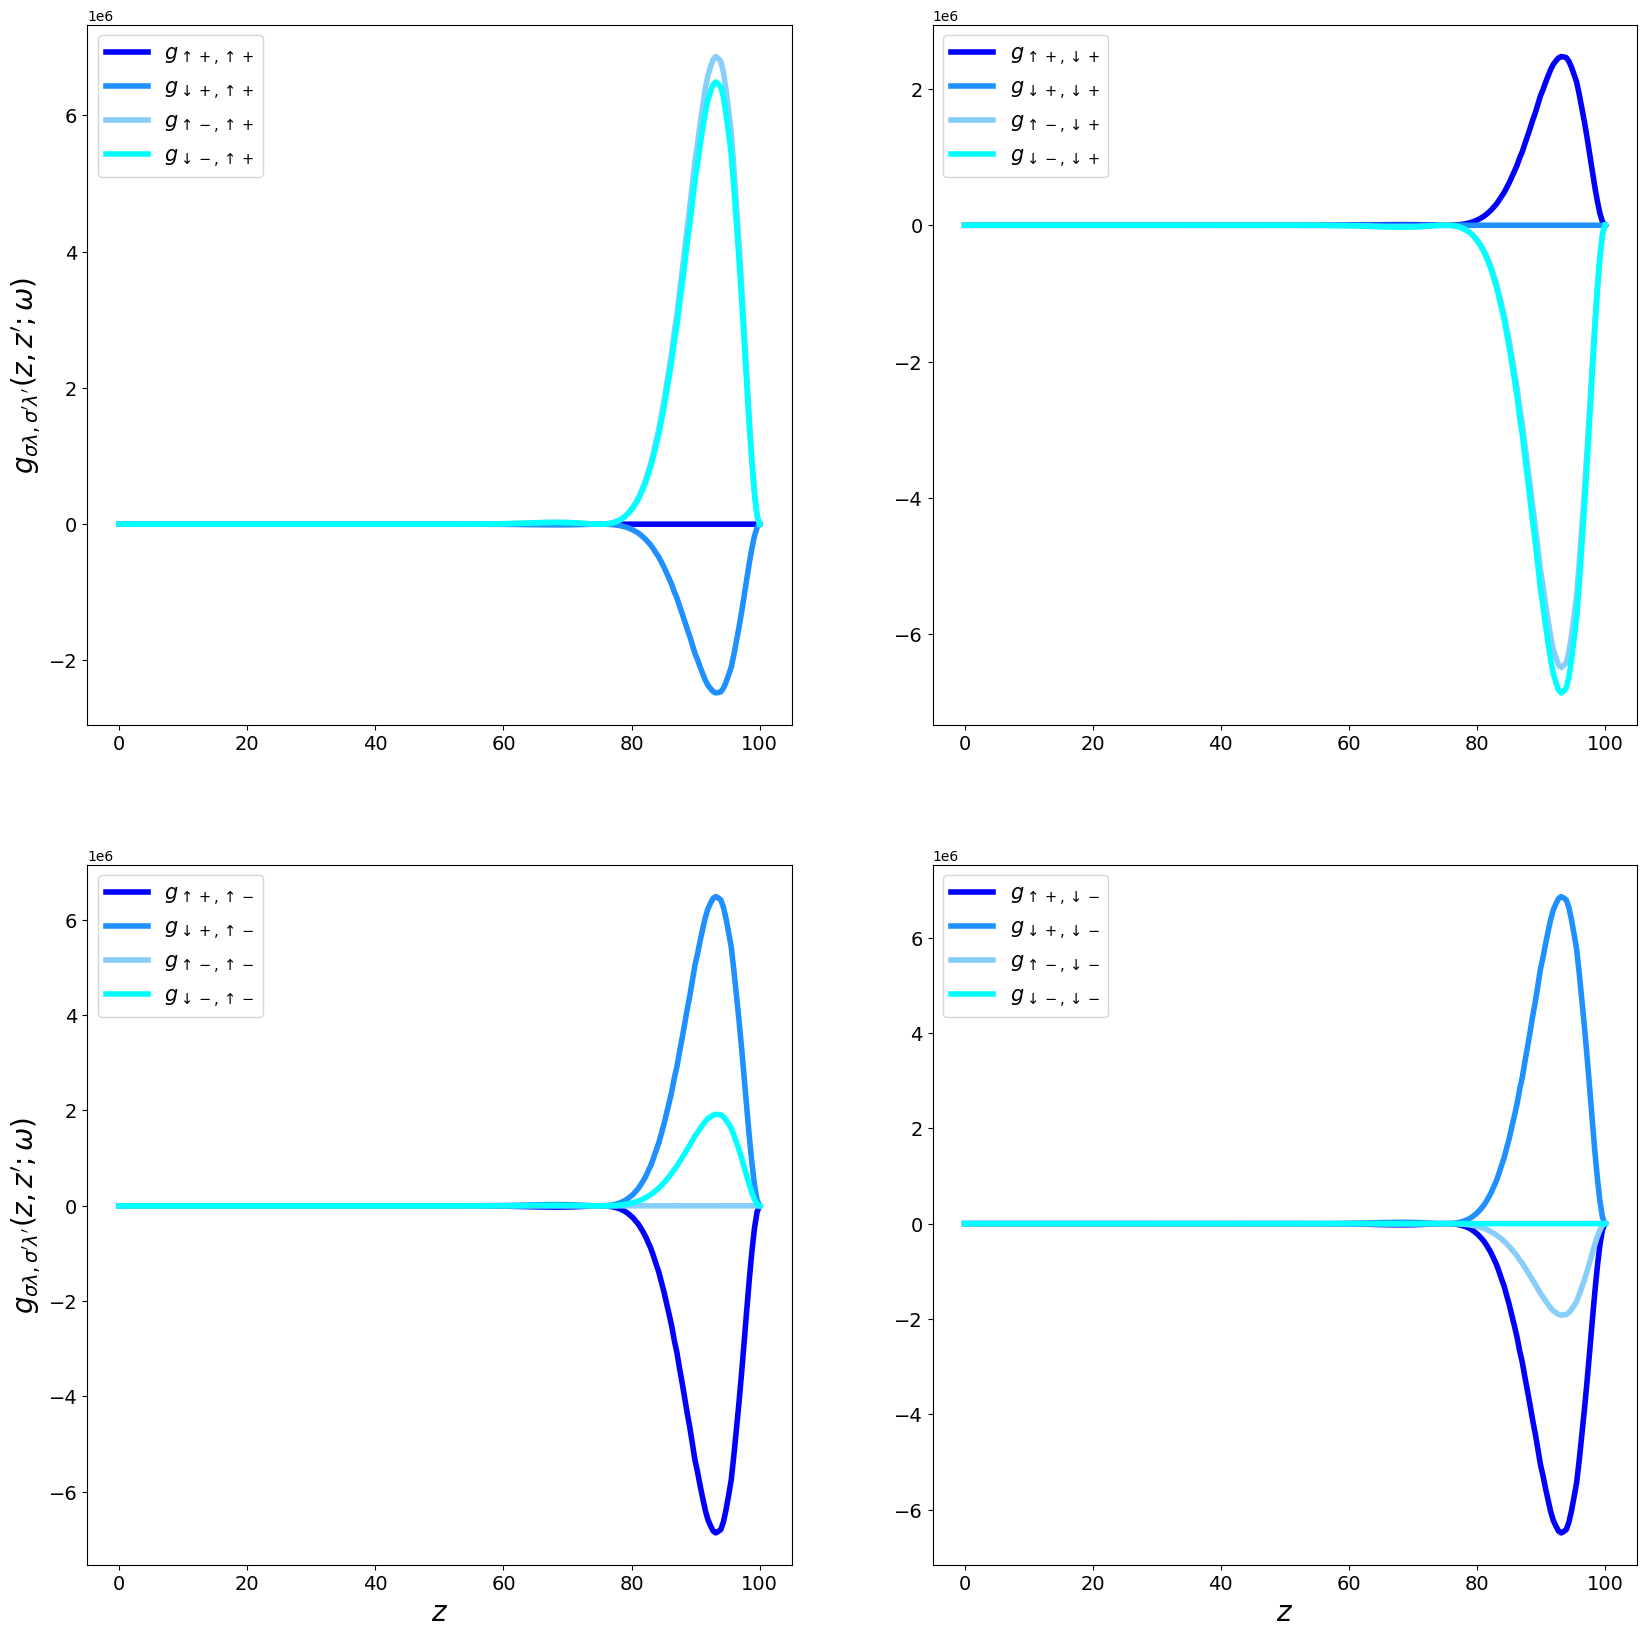

In [7]:
# select lattice
lattice = lattice1
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_zZ[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])
        # plot the unperturbed GF
        #axs[iPic][jPic].plot(lattice, [G0_zZ[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], ls=':', lw=3)
        
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Green's Function for $z'=73.2$

#### <font color='green'> **Real Part** </font> 

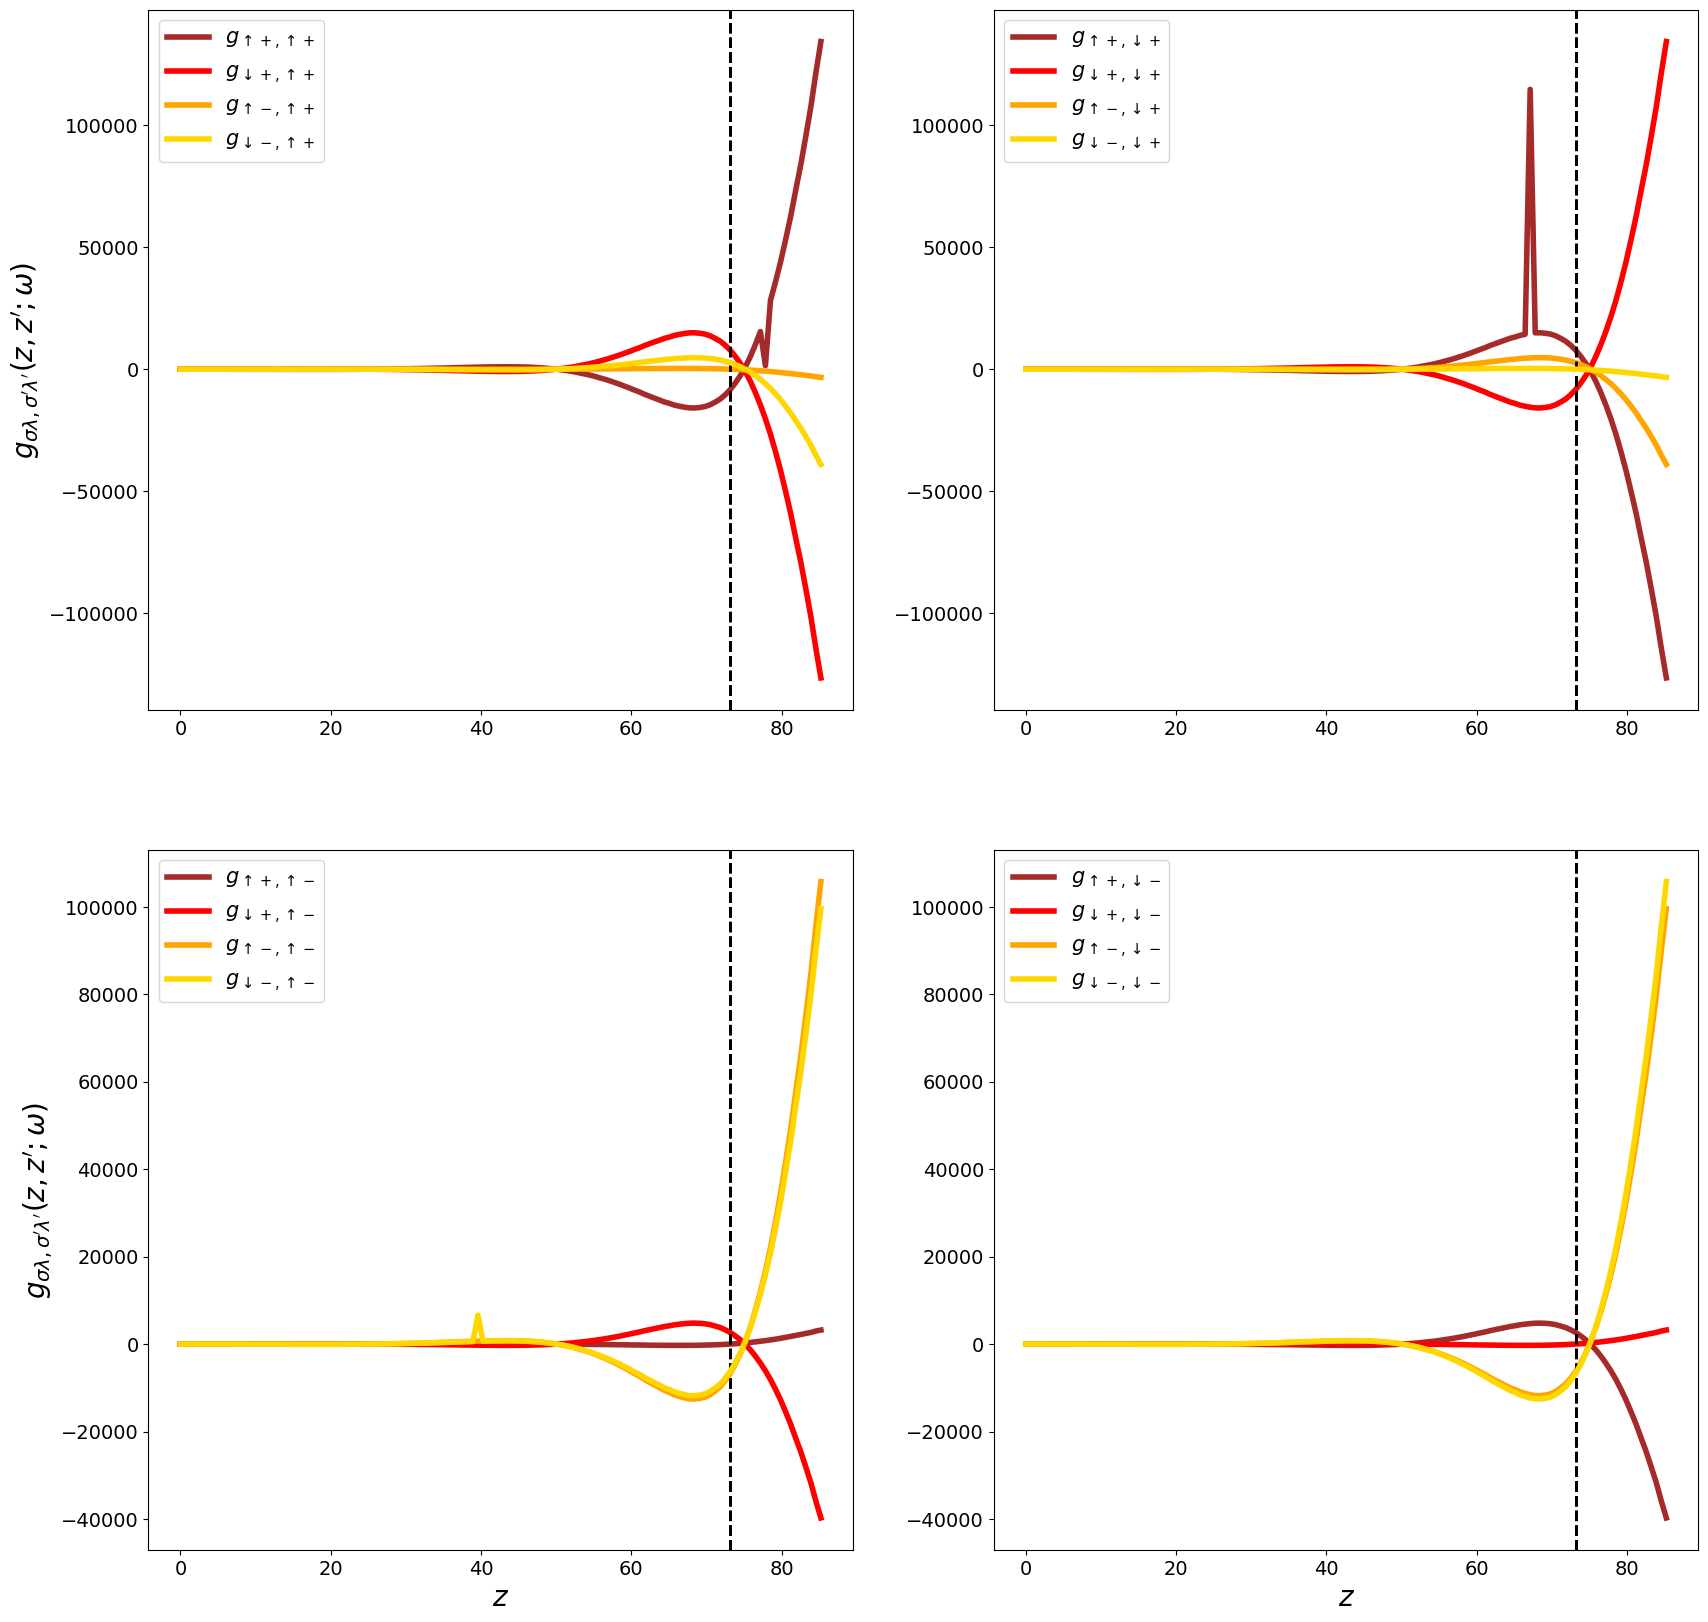

In [8]:
# select lattice
lattice = lattice2
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=73.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_Zfixed[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

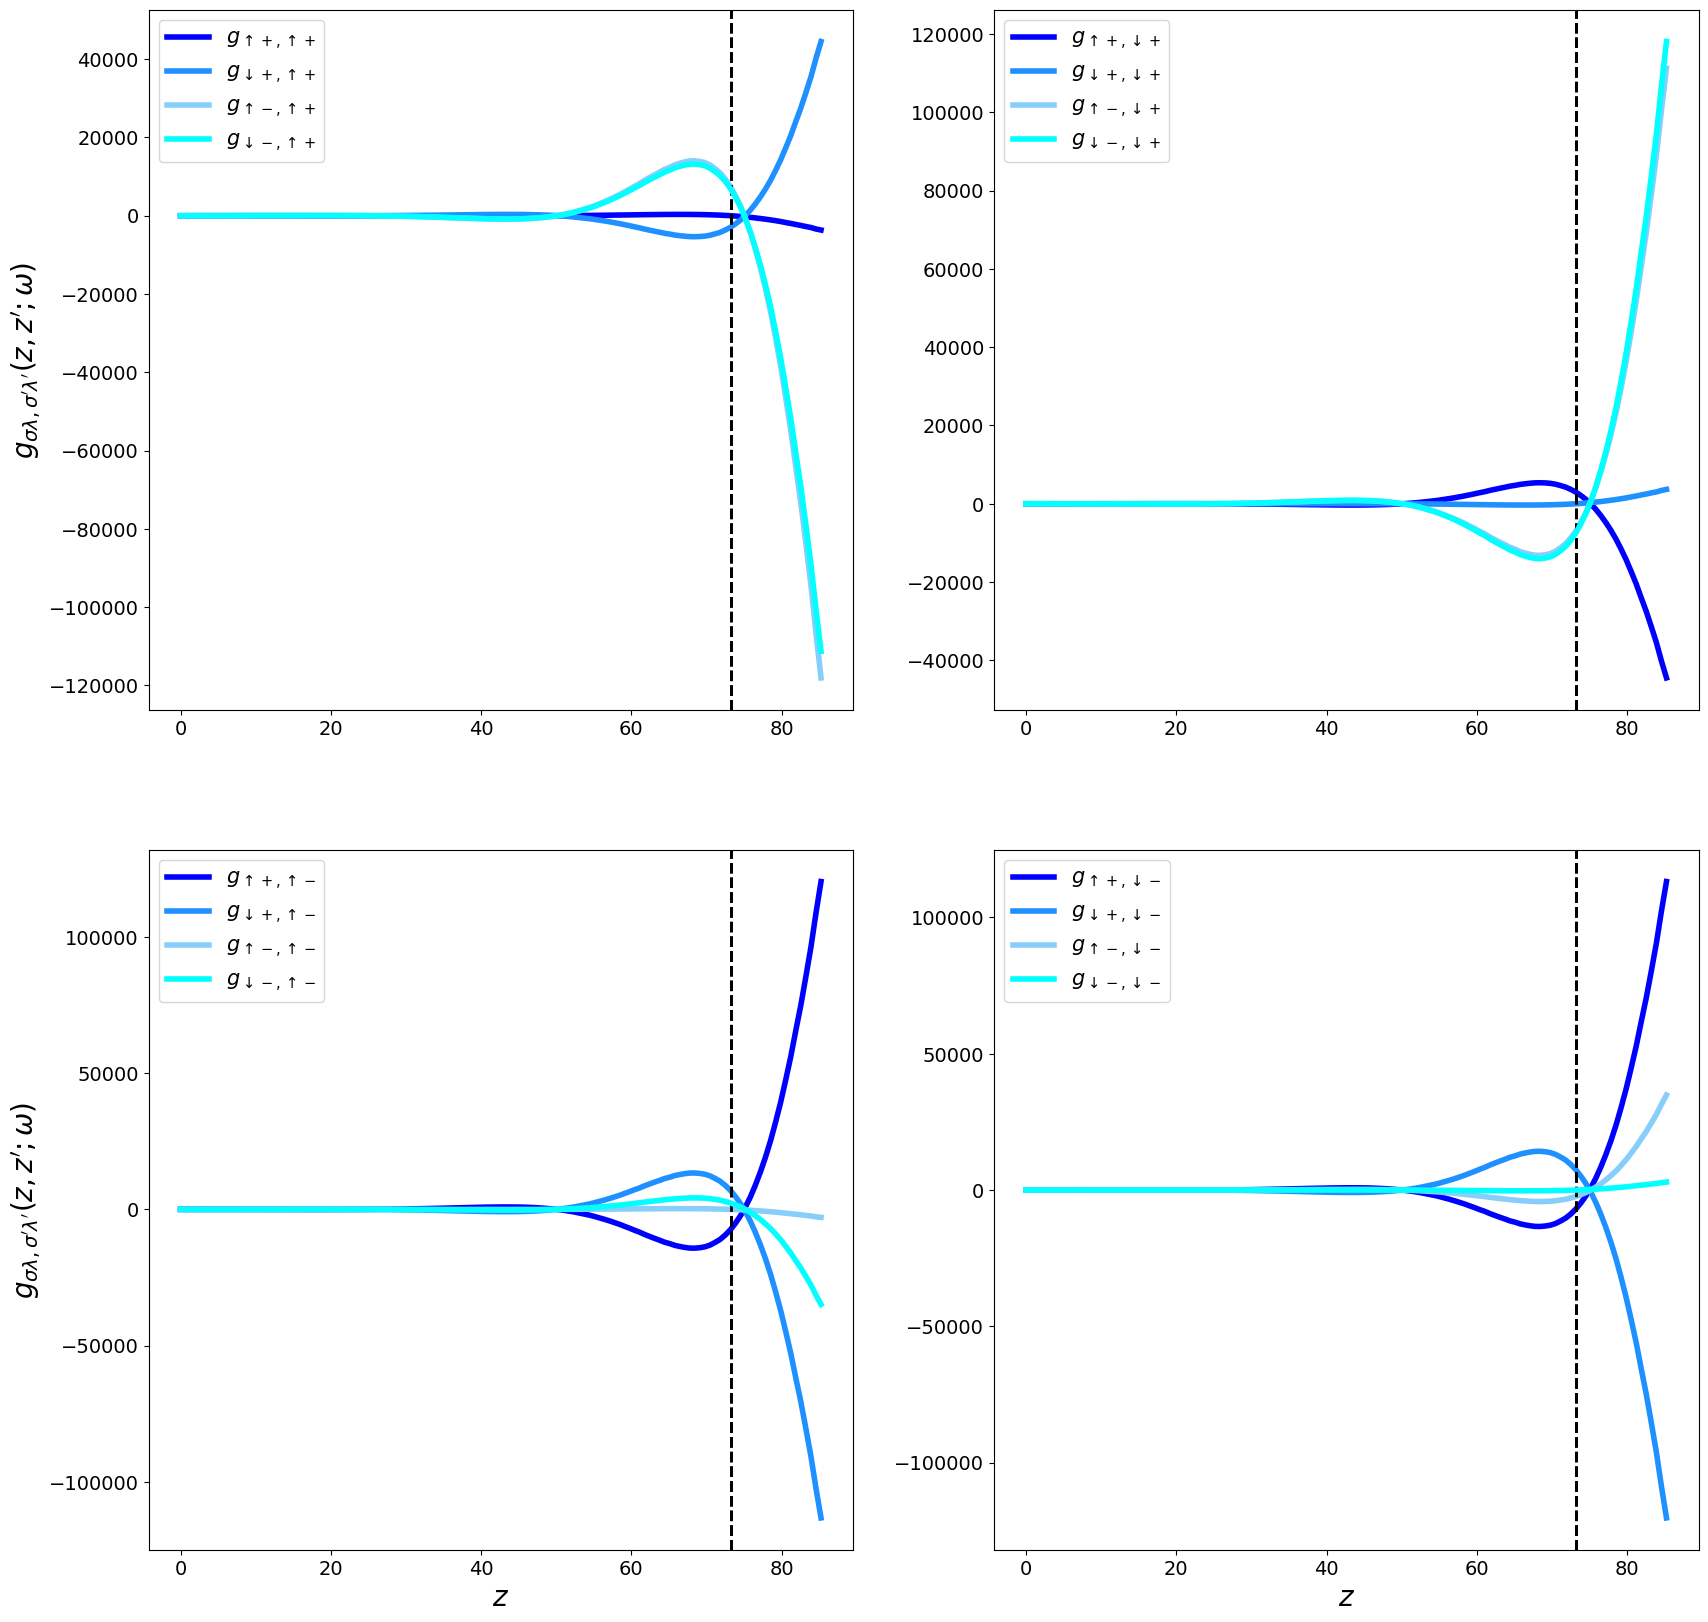

In [9]:
# select lattice
lattice = lattice2
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=73.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_Zfixed[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Green's Function for $z=36.8$

#### <font color='green'> **Real Part** </font> 

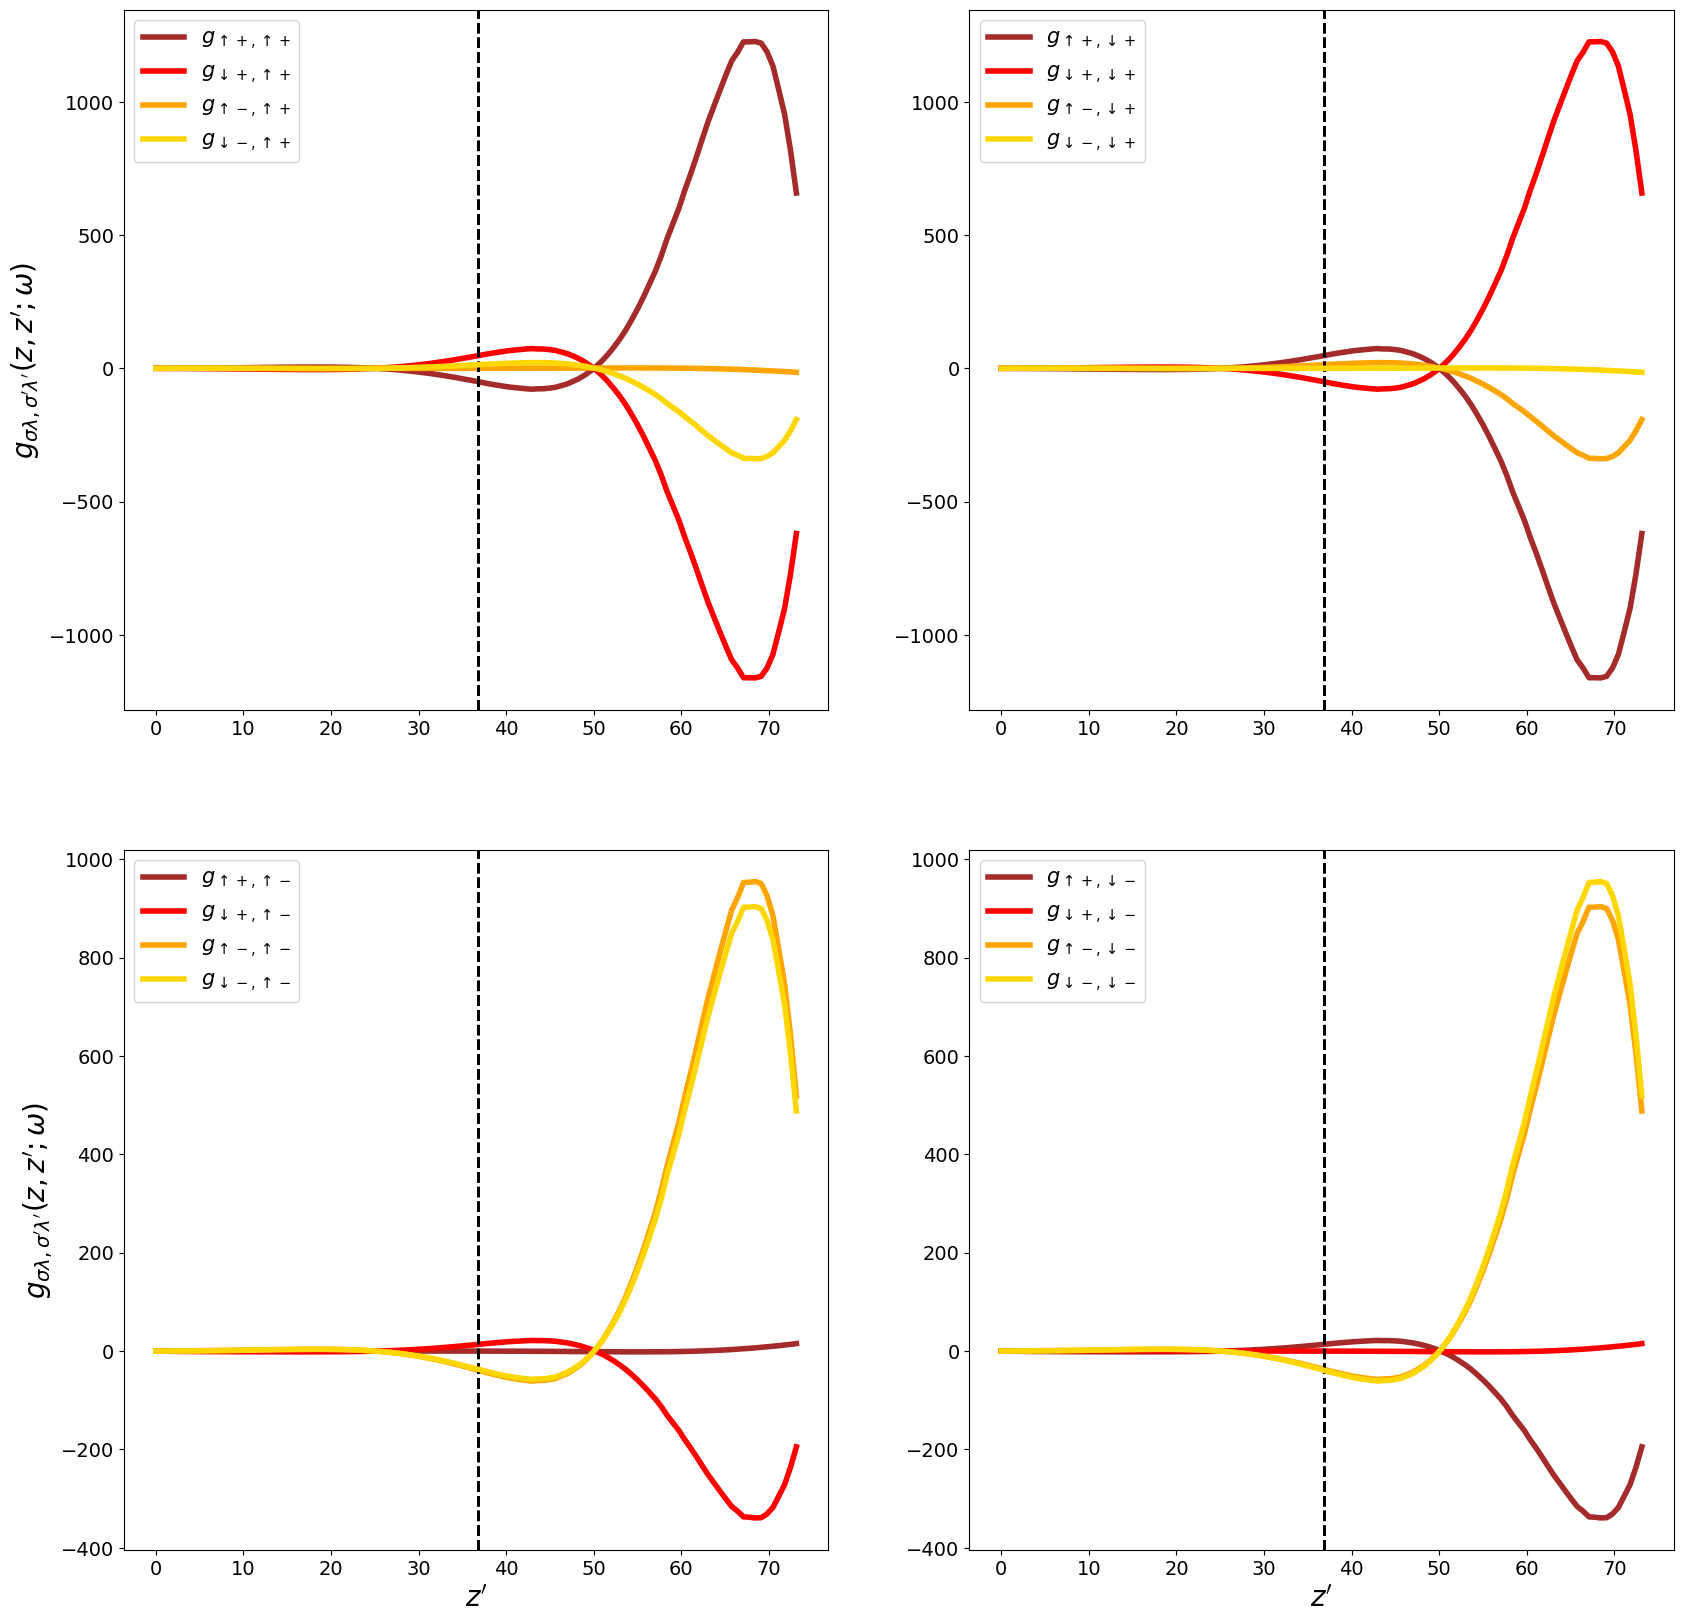

In [10]:
# select lattice
lattice = lattice3
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=36.8, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_zfixed[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

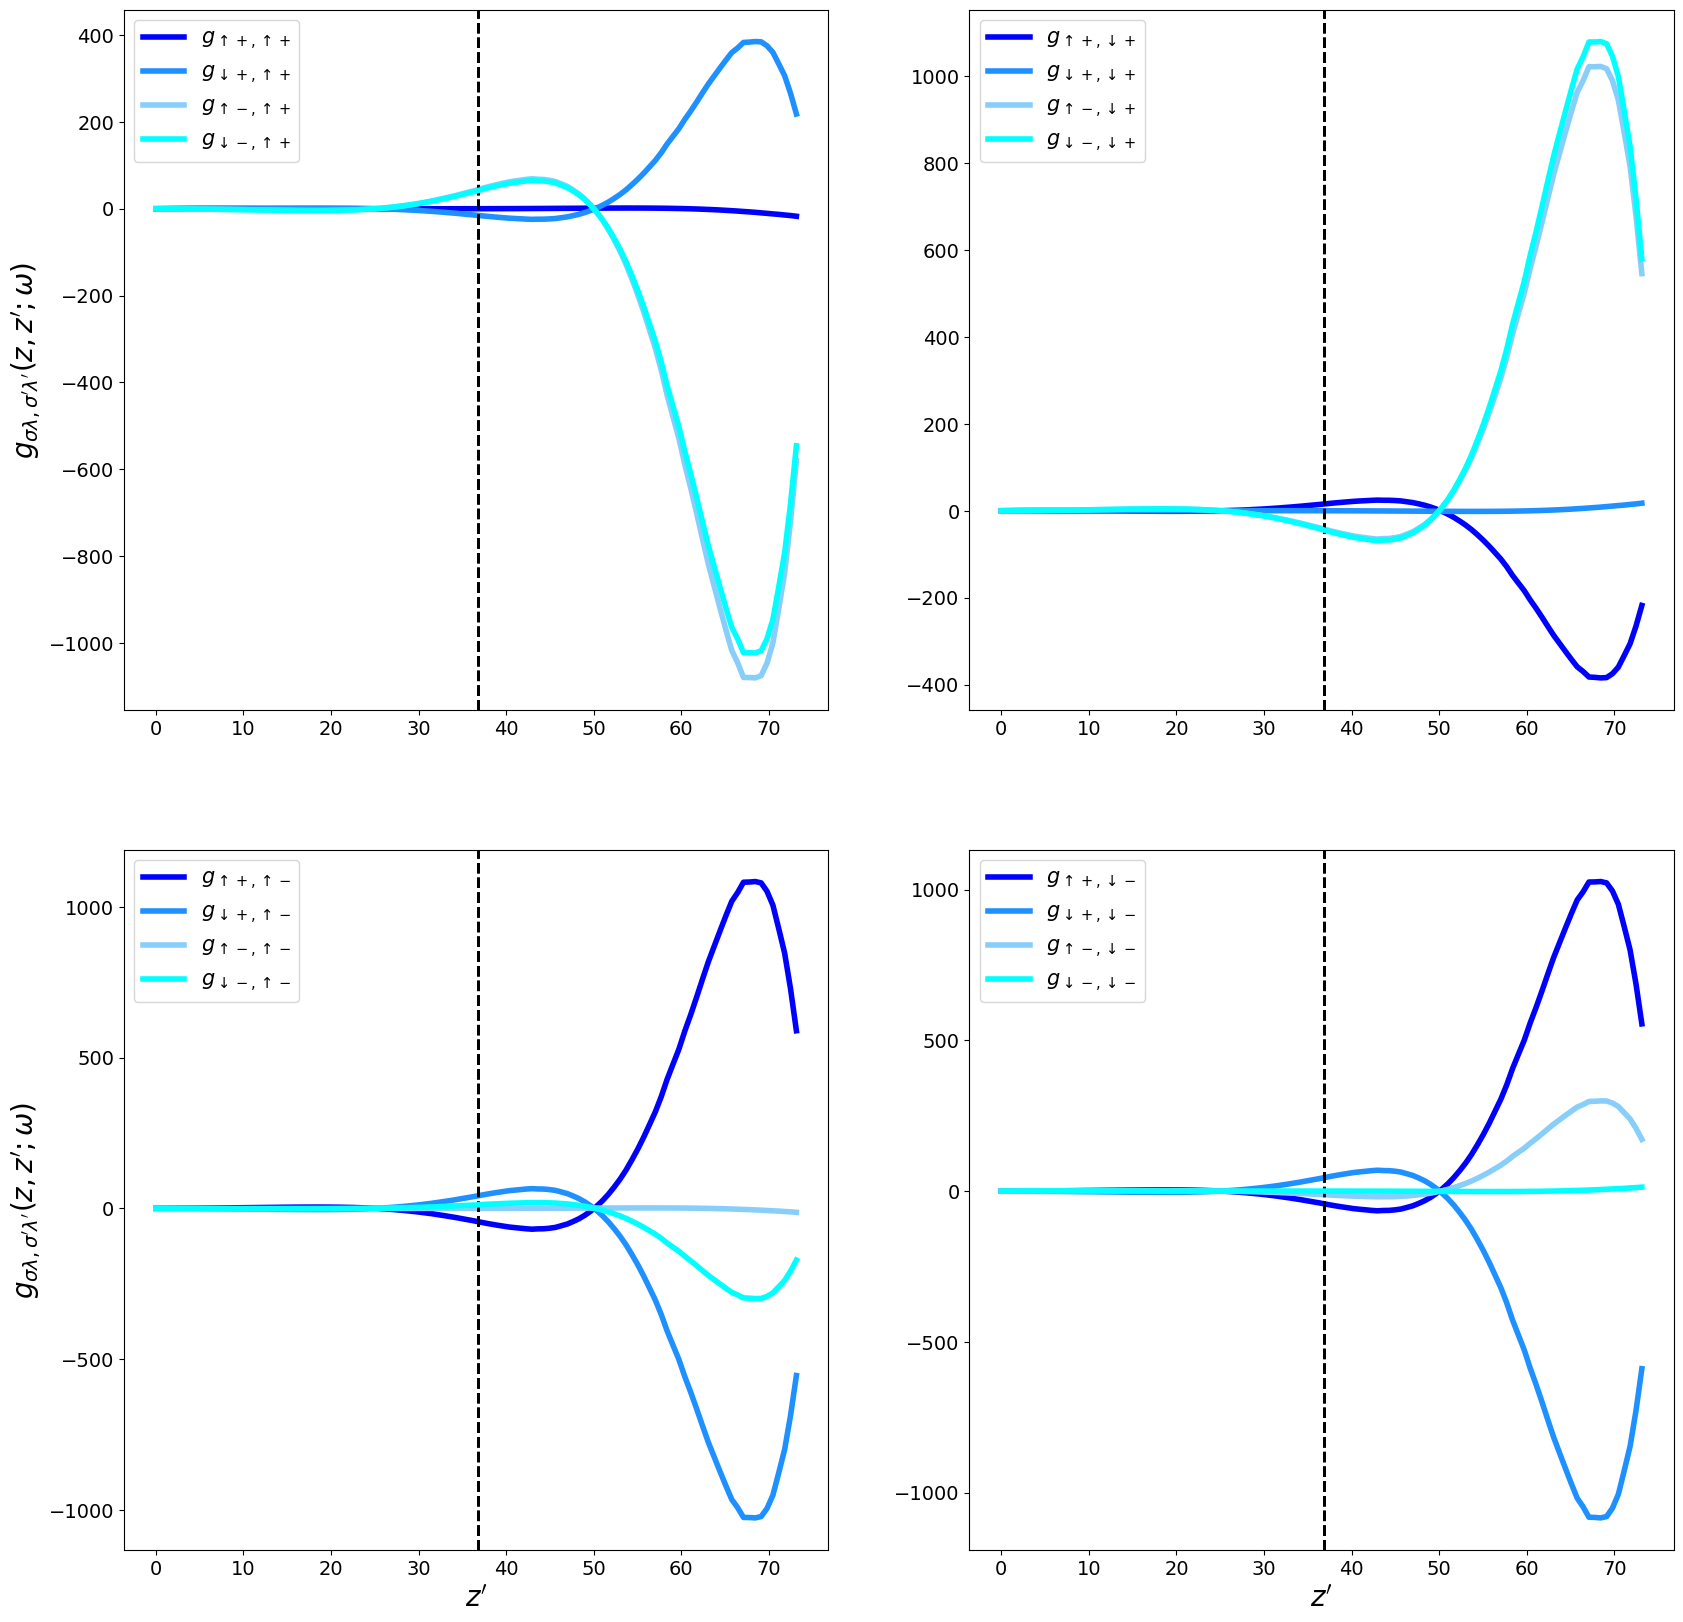

In [11]:
# select lattice
lattice = lattice3
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=36.8, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [G2_zfixed[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## **Anomalous Green's Function**

The anomalous MTI Green's function in the Heisenberg representation
$$
	\mathcal{F}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
    -i \left\langle
    T_t \hat{\psi}^\dagger_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
    \right\rangle \,,
$$
can be expressed using interacting picture in perturbative series as
$$
	\mathcal{F}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	\frac{
	\bra{\phi_0} T_t 
	{\psi}^\dagger_{\sigma\lambda}(zt) 
	{V}(t_1) \dots {V}(t_n)	
	{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,,
$$
and the leading-order correction can be evaluated as
$$
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    =
    \sum_{ss't} \sum_{rr'l} dt_1 \, dt_2 dw \, dw' \, dv \, dv' \,
    \mathcal{G}^{(0)}_{rl, \sigma\lambda}(v t_2, zt)
    \gamma_{rl}^{r' \, \dagger}(v',v) 
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(v' t_2, w' t_1)
    \gamma_{st}^{s' \, \dagger}(w',w) 
    \mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w t_1, z't') \,.
$$
The corresponding Feynman diagram is plotted in the picture below.


<p style="text-align:center;">
<img src="Correction_AnomalousGF.png" width=85% height=85% class="center" />
</p>


Since the Hamiltonian does not depend explicitly on time, we can transform to frequency space through
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma, \sigma'}(z,z'; \omega) = 
    \int d(t-t') \, e^{i\omega(t-t')} 
    \mathcal{F}^{\dagger \, (0)}_{\sigma, \sigma'}(z,z'; t-t') \,,
$$
the above equation can be expressed as
$$
	\begin{split}
		\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
		= &
		\sum_{ss't} \sum_{rr'l} 
		\int dw \, dw' \, \int dv \, dv' \,
		\gamma_{st}^{s' \, \dagger}(w',w) \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
		& \times \, 
		\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; -\omega)
            \mathcal{F}^{\dagger \, (0)}_{r', s'}(v',w';\omega)
		\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; \omega) \,,
	\end{split}
$$
and in matrix notation becomes
$$
    \boxed{
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
    =
    \int dw \, dw' \, dv \, dv' \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega)} \,.
$$

In [12]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(0, d, 250); fSC = np.array([GFanomalous(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Anomalous Green's Functions** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate. 
The unperturbed Green's function in the MTI $\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$ and in the superconductor $\mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega)$ are also shown.
In our model we assumed that the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) = 0 
    \qquad \text{for} \quad z,z' \leq 0 \; \lor \; z,z' \geq d \,,
$$
and, similarly, the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega) = 0 
    \qquad \text{for} \qquad \text{for} \quad z-z' \leq d \,.
$$

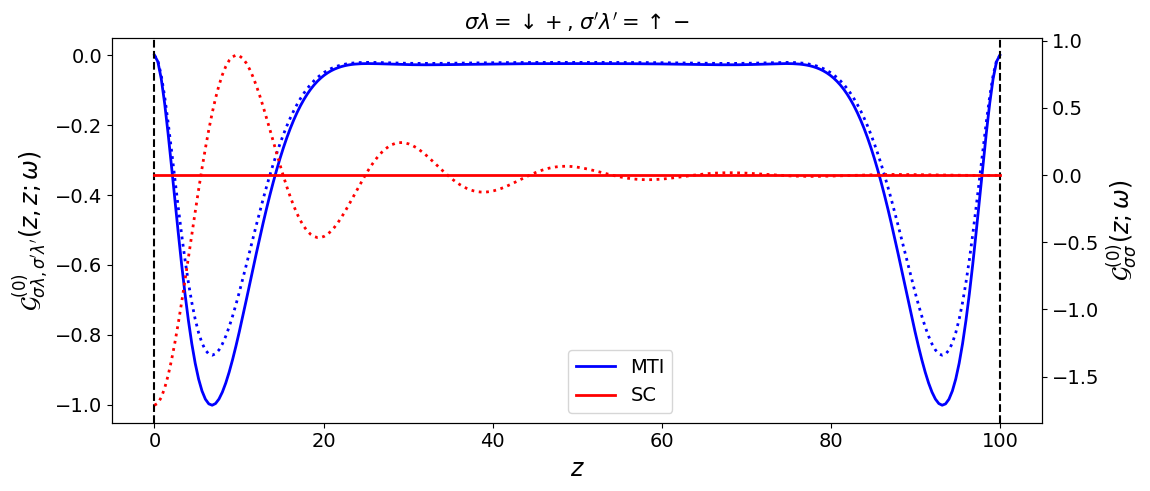

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 1; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, fSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, fSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
#axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
#axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.6, 0.275));

We can now evaluate the second order correction to the normal MTI Green's function
$$
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
    =
    \int dw \, dw' \, dv \, dv' \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) \,.
$$ 
Using the above assumption for the tunneling function, the second-order correction becomes
$$
\begin{split}
    \mathcal{F}^{\dagger \, (2)}_{MTI}(z,z'; \omega)
    &=
    \int dw \, dw' \, dv \, dv' \,
    \delta(w+w'-2d) \tilde{f}(w) \,
    \delta(v+v'-2d) \tilde{f}(v) \times \\[5pt]
    %
    & \qquad \times \, \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(2d-w,2d-v;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(v-w;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) \,,
\end{split}
$$
where we used the translational invariance of the superconductor $\mathcal{F}_{SC}^{\dagger \, (0)}(z,z'; \omega) \equiv \mathcal{F}_{SC}^{\dagger \, (0)}(z-z'; \omega)$.
It is worth noting that here the integrated variables live in the domain $ 0 \leq w,v \leq d$, since they both refer to electrons in the MTI.




#### <font color='green'> **Leading-Order Correction** </font> 

Below we compute the following integral for the second order correction to the anomalous MTI Green's fucntion:
$$
\boxed{
   \mathcal{F}^{\dagger \, (2)}_{MTI}(z,z'; \omega) =
    \int dw \, dv \,
    \tilde{f}(z_1) \, \tilde{f}(z_2) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(z_1,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(z_2-z_1;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(z_2,z'; \omega)
} \,.
$$

In [14]:
from scipy.integrate import quad_vec

# define the integrand functions
def F2_integrand(z1, z2, d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # spatial functions
    fz1 = spatial_tunneling(z1, d=d, lT=lT); fz2 = spatial_tunneling(z2, d=d, lT=lT)

    # GMTI(z,z1; -omega)
    GMTIz = np.transpose(GFexact(d=d, z=z, Z=z1, kx=kx, ky=ky, L=L, w=-omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar))
    
    # GMTI(z2,z'; omega)
    GMTIZ = GFexact(d=d, z=z2, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # FSC(z2-z1; omega)
    FSC = GFanomalousMat(z=z2-z1, kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    return fz1*fz2 * (GMTIz @ np.conjugate(Gamma) @ FSC @ Gamma.H @ GMTIZ).A



# Second order correction to the normal GF
def F2_montecarlo(d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, Nsamples = 10000, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # z1,z2 random samples
    #z1_samples = np.random.uniform(0., d, Nsamples); z2_samples = np.random.uniform(0., d, Nsamples)

    # importance sampling
    z1 = np.random.normal(loc=d, scale=lT, size=Nsamples); z2 = np.random.normal(loc=d, scale=lT, size=Nsamples);
    # restrict to values in [0,d]
    z1_samples = np.where(z1 > d, 2*d-z1, z1); z2_samples = np.where(z2 > d, 2*d-z2, z2)
    
    # importance sampling function 
    qi = lambda x1,x2: spatial_tunneling(x1,d,lT)*spatial_tunneling(x2,d,lT)
    
    # matrix for mean values
    fsum = np.zeros((4,4), dtype='complex')

    # loop over samples
    for (z1,z2) in zip(z1_samples, z2_samples):
        
        # compute mean of fwv function
        fsum += F2_integrand(z1, z2, d=d, z=z, Z=Z, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)/qi(z1,z2)

    return pow(d,2)*fsum/float(Nsamples)



# Second order correction to the normal GF with scipy quad_vec
def F2_quad_vec(d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, Nint=100, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # define integrand function 
    fintegrand = lambda z1, z2: F2_integrand(z1, z2, d=d, z=z, Z=Z, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # compute double integral
    return quad_vec(lambda z1 : quad_vec(lambda z2: fintegrand(z1, z2), 0., d)[0], 0., d)[0]

## **Second-Order Term**

In [15]:
from Reading import Read_GreenFunction

# parameters
d = 100.; kx = 0.002; ky = 0.006; L = 0.
# tunneling parameters
lT = 0.05*d; gamma = 0.001
# energies
mu = 0.010; Delta = 0.005; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])


# F2 with z=z'
lattice1, F2_zZ = Read_GreenFunction('L-0/Importance-50000_no-gamma/F2-zZ.out')
# F2 with z' fixed
lattice2, F2_Zfixed = Read_GreenFunction('L-0/Importance-50000_no-gamma/F2-Z-fixed.out')
# F2 with z fixed
lattice3, F2_zfixed = Read_GreenFunction('L-0/Importance-50000_no-gamma/F2-z-fixed.out', zIdx=1)

### Green's Function for $z=z'$

#### <font color='green'> **Real Part** </font> 

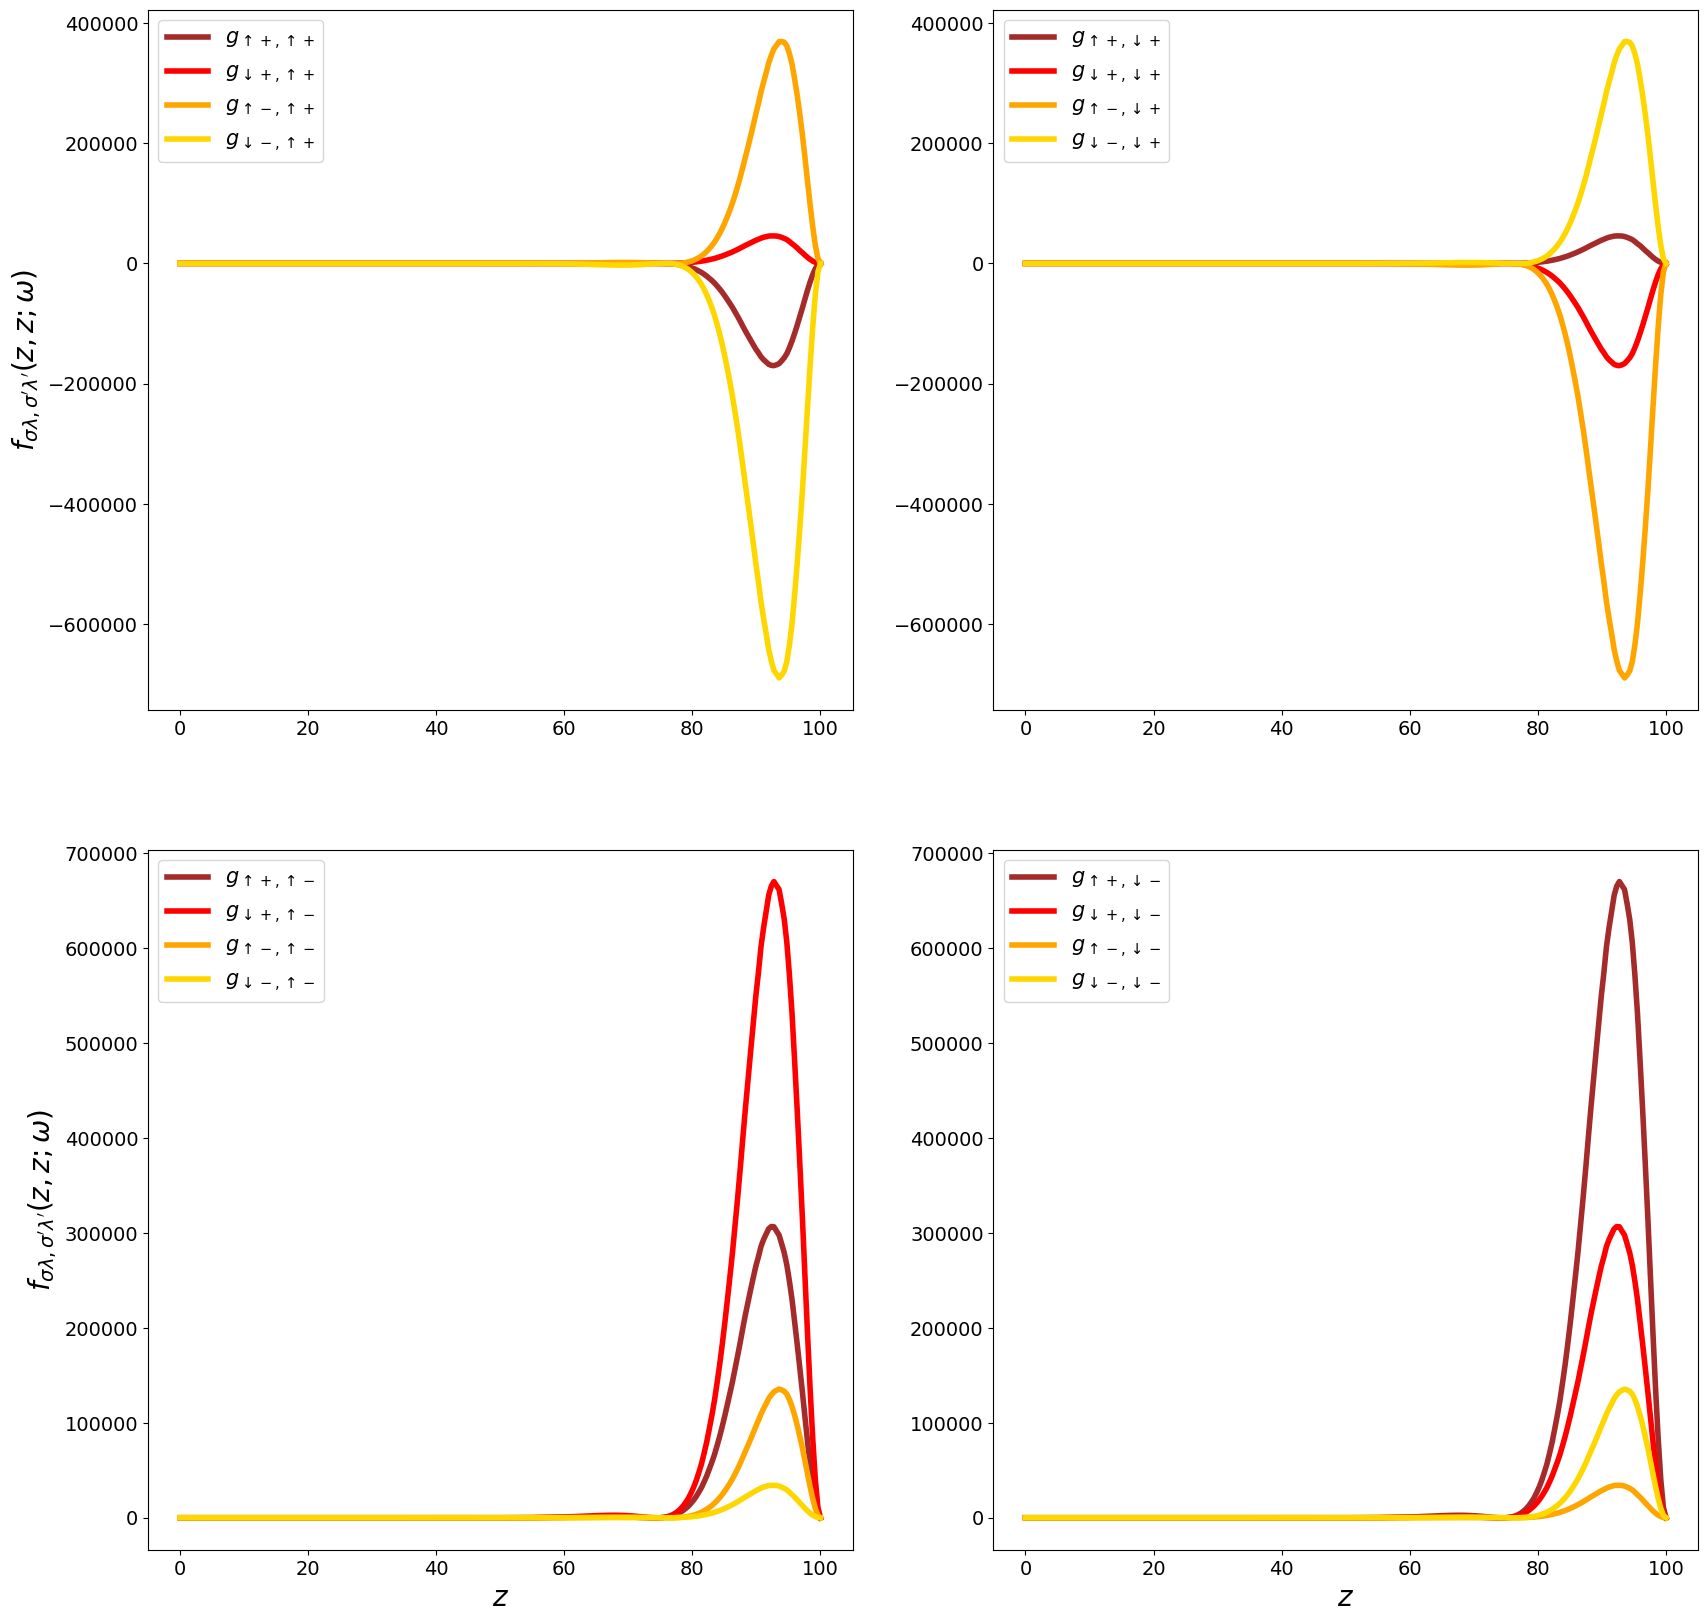

In [16]:
# select lattice
lattice = lattice1
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_zZ[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])#, linestyle='-', marker='o') 
    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

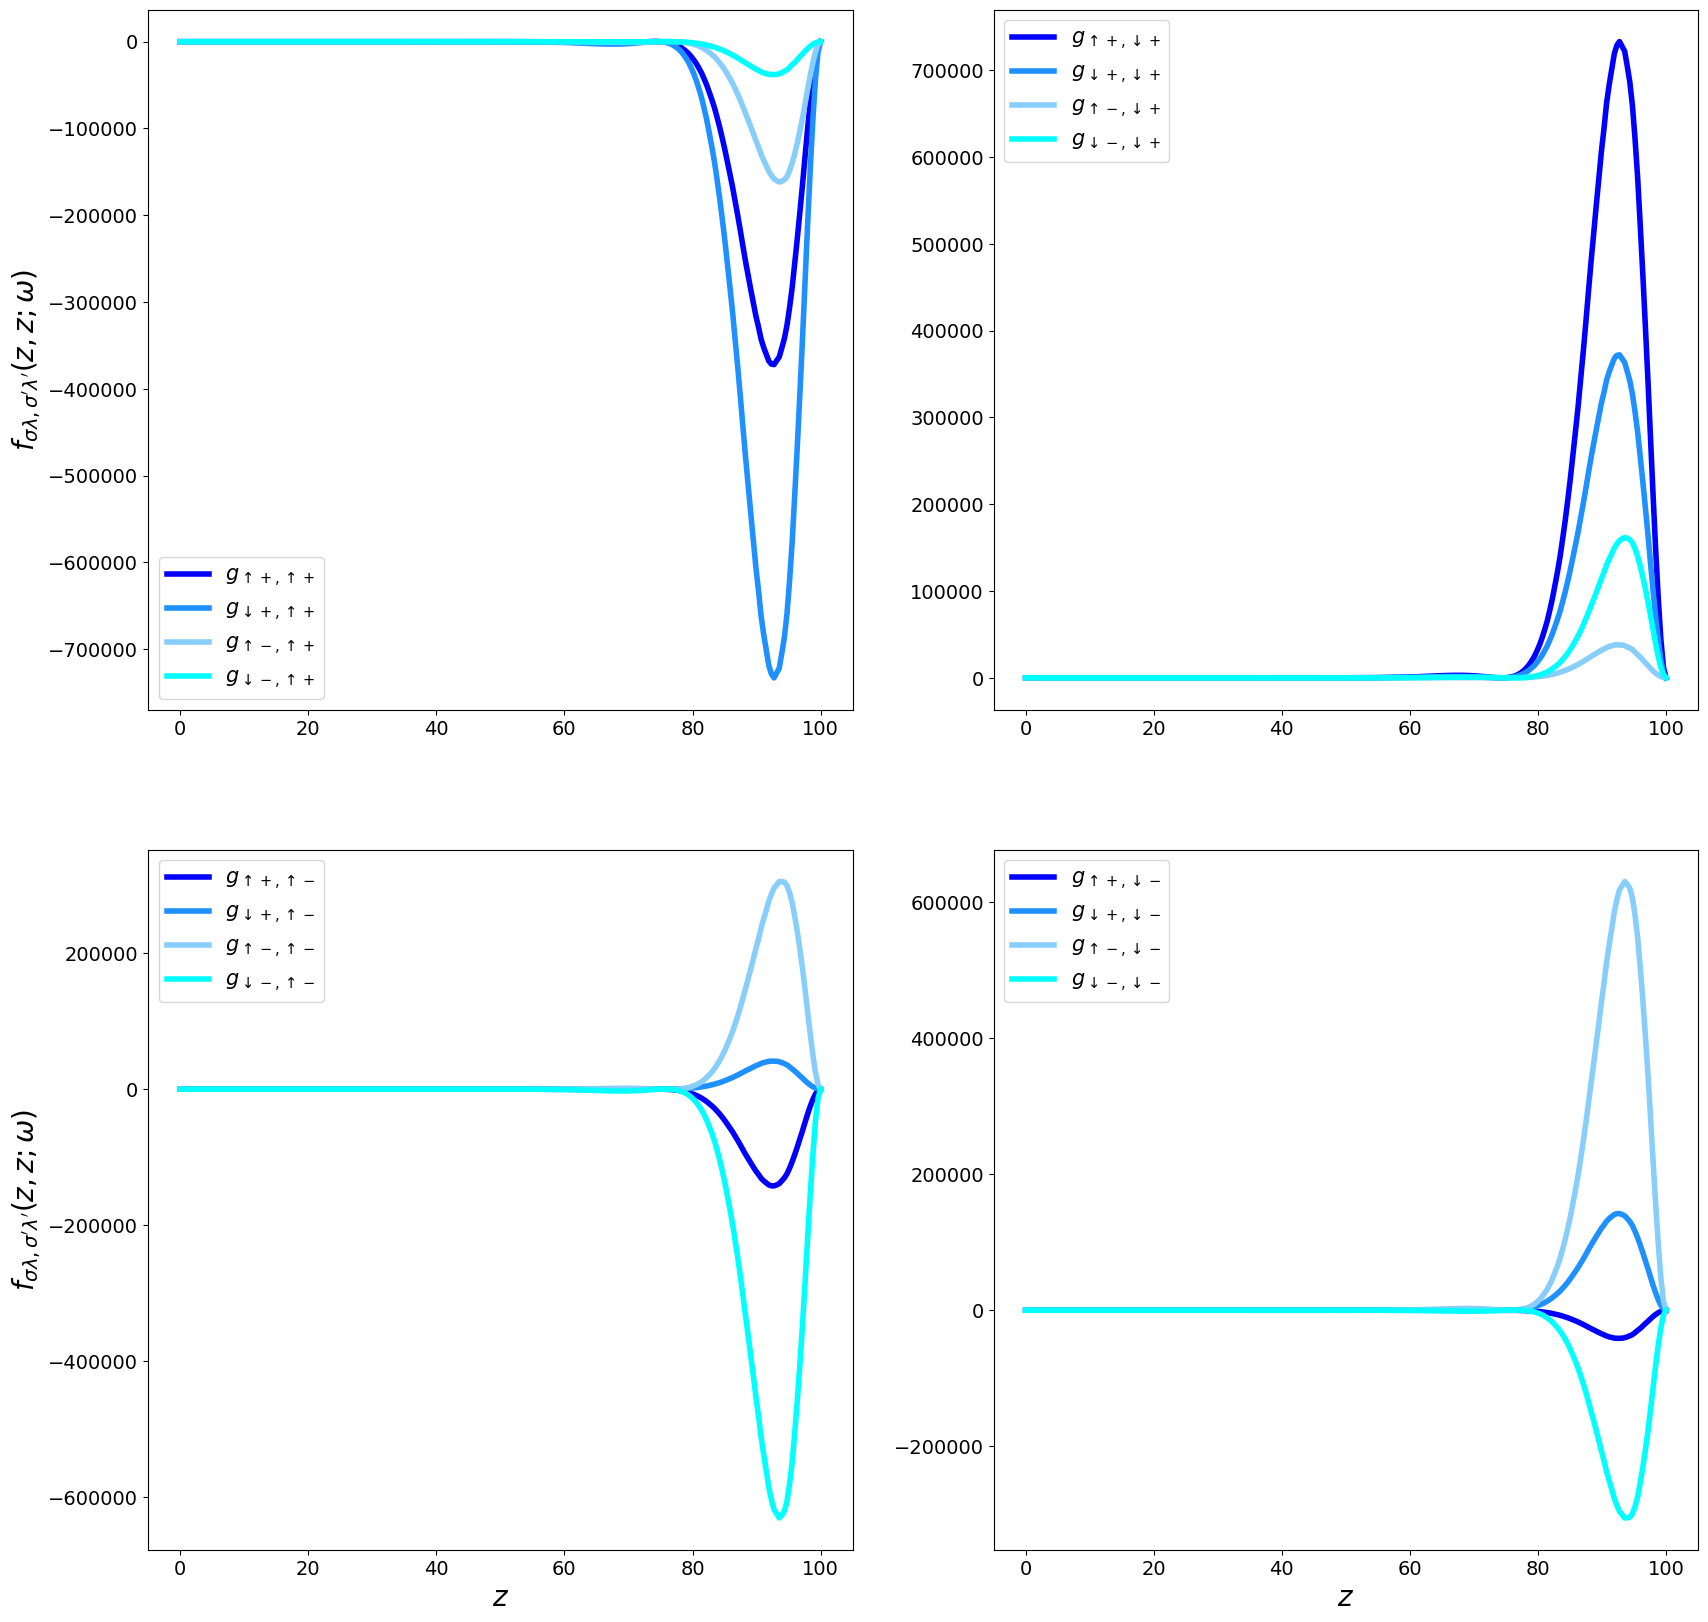

In [17]:
# select lattice
lattice = lattice1
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_zZ[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])
    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Green's Function for $z'=93.4$

#### <font color='green'> **Real Part** </font> 

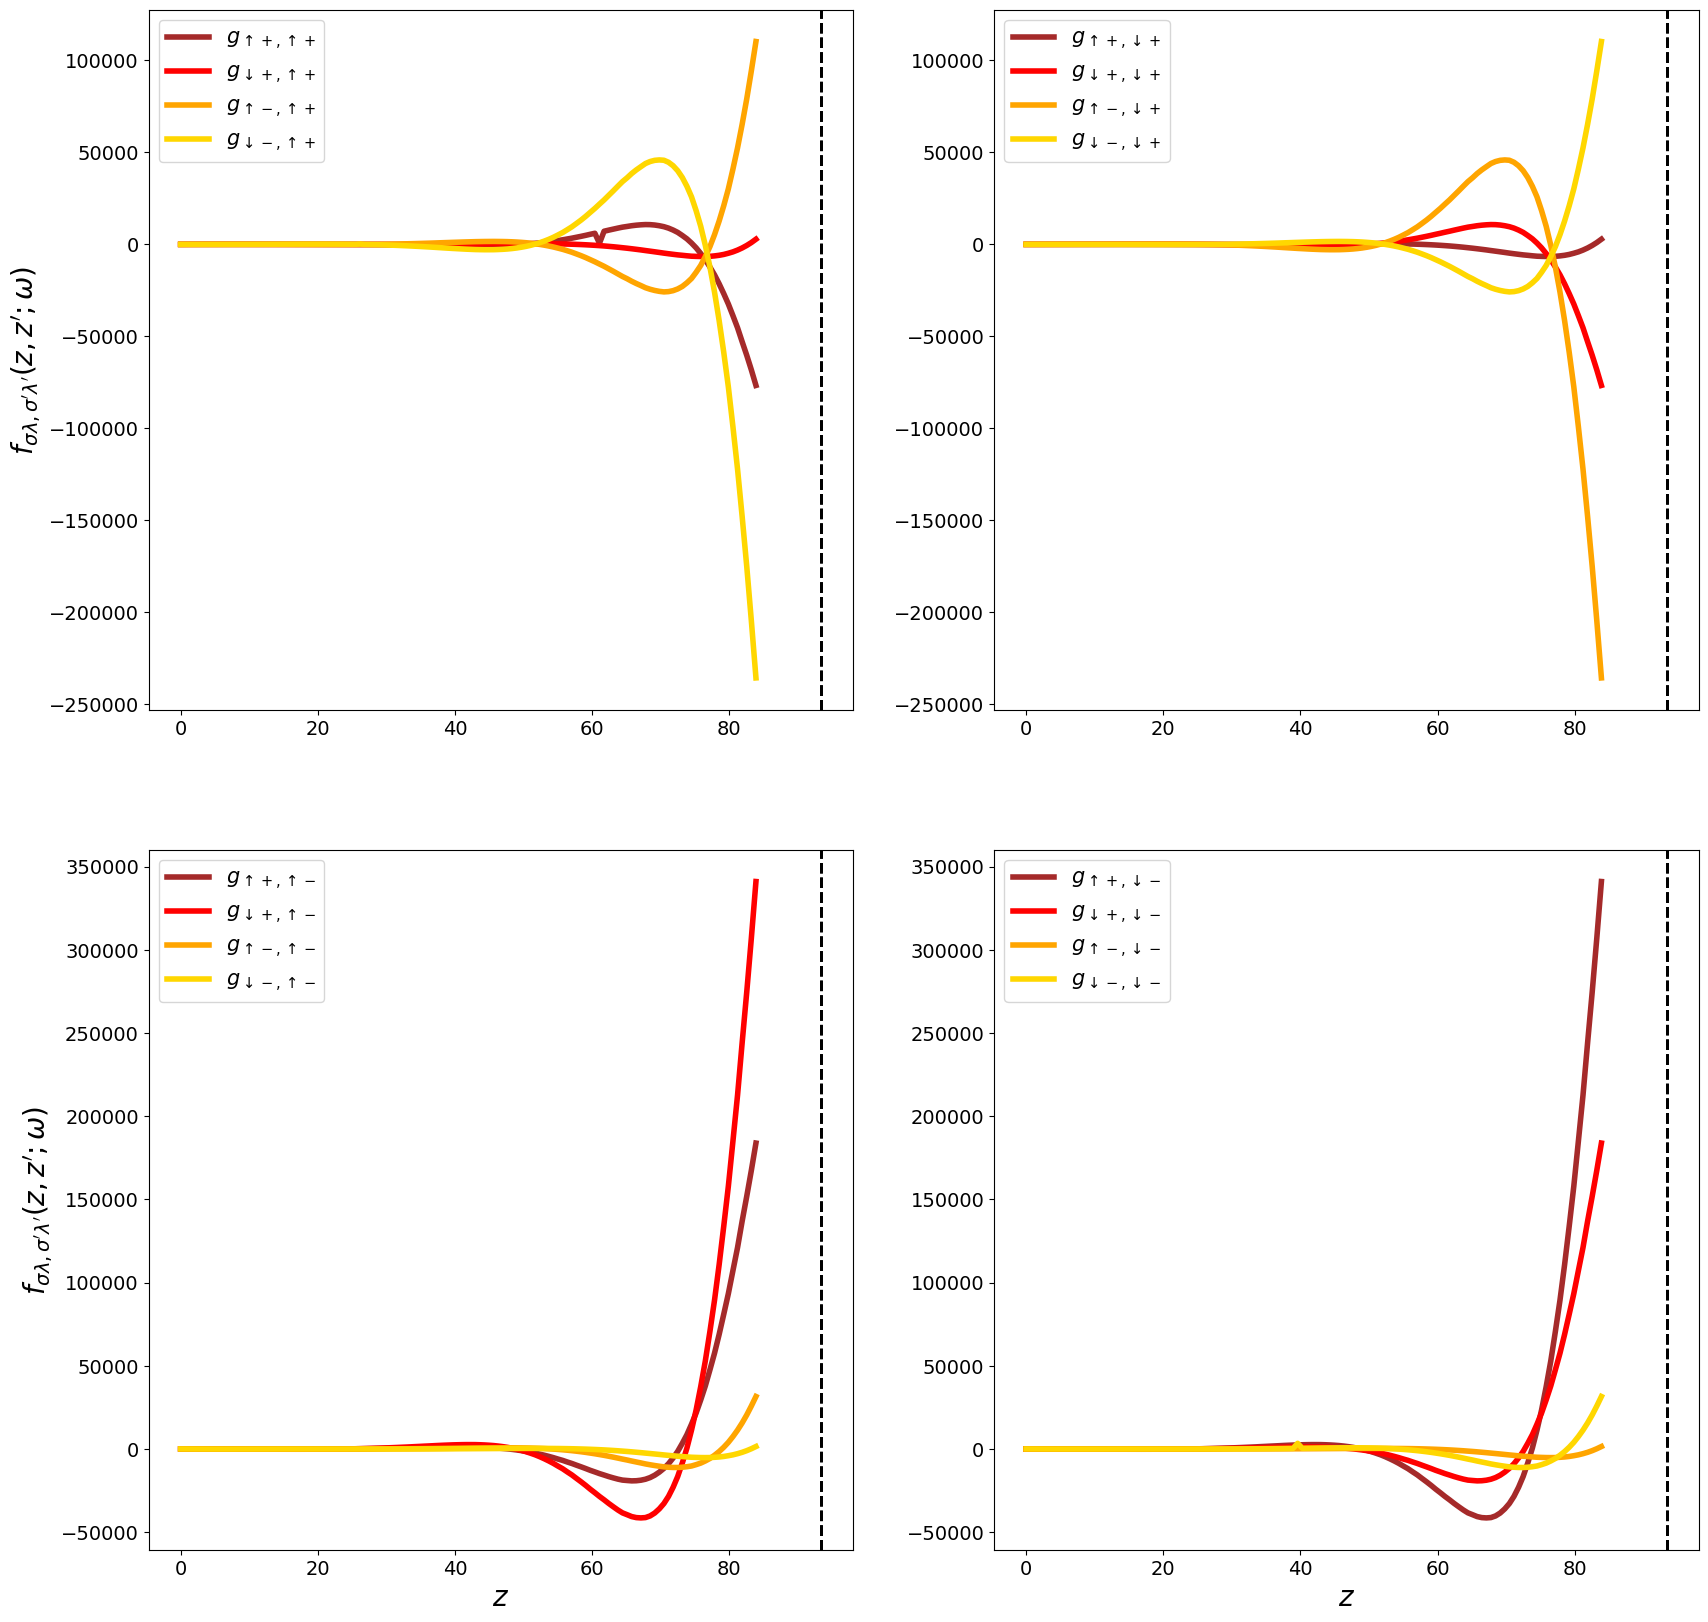

In [18]:
# select lattice
lattice = lattice2
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=93.4, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_Zfixed[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font>

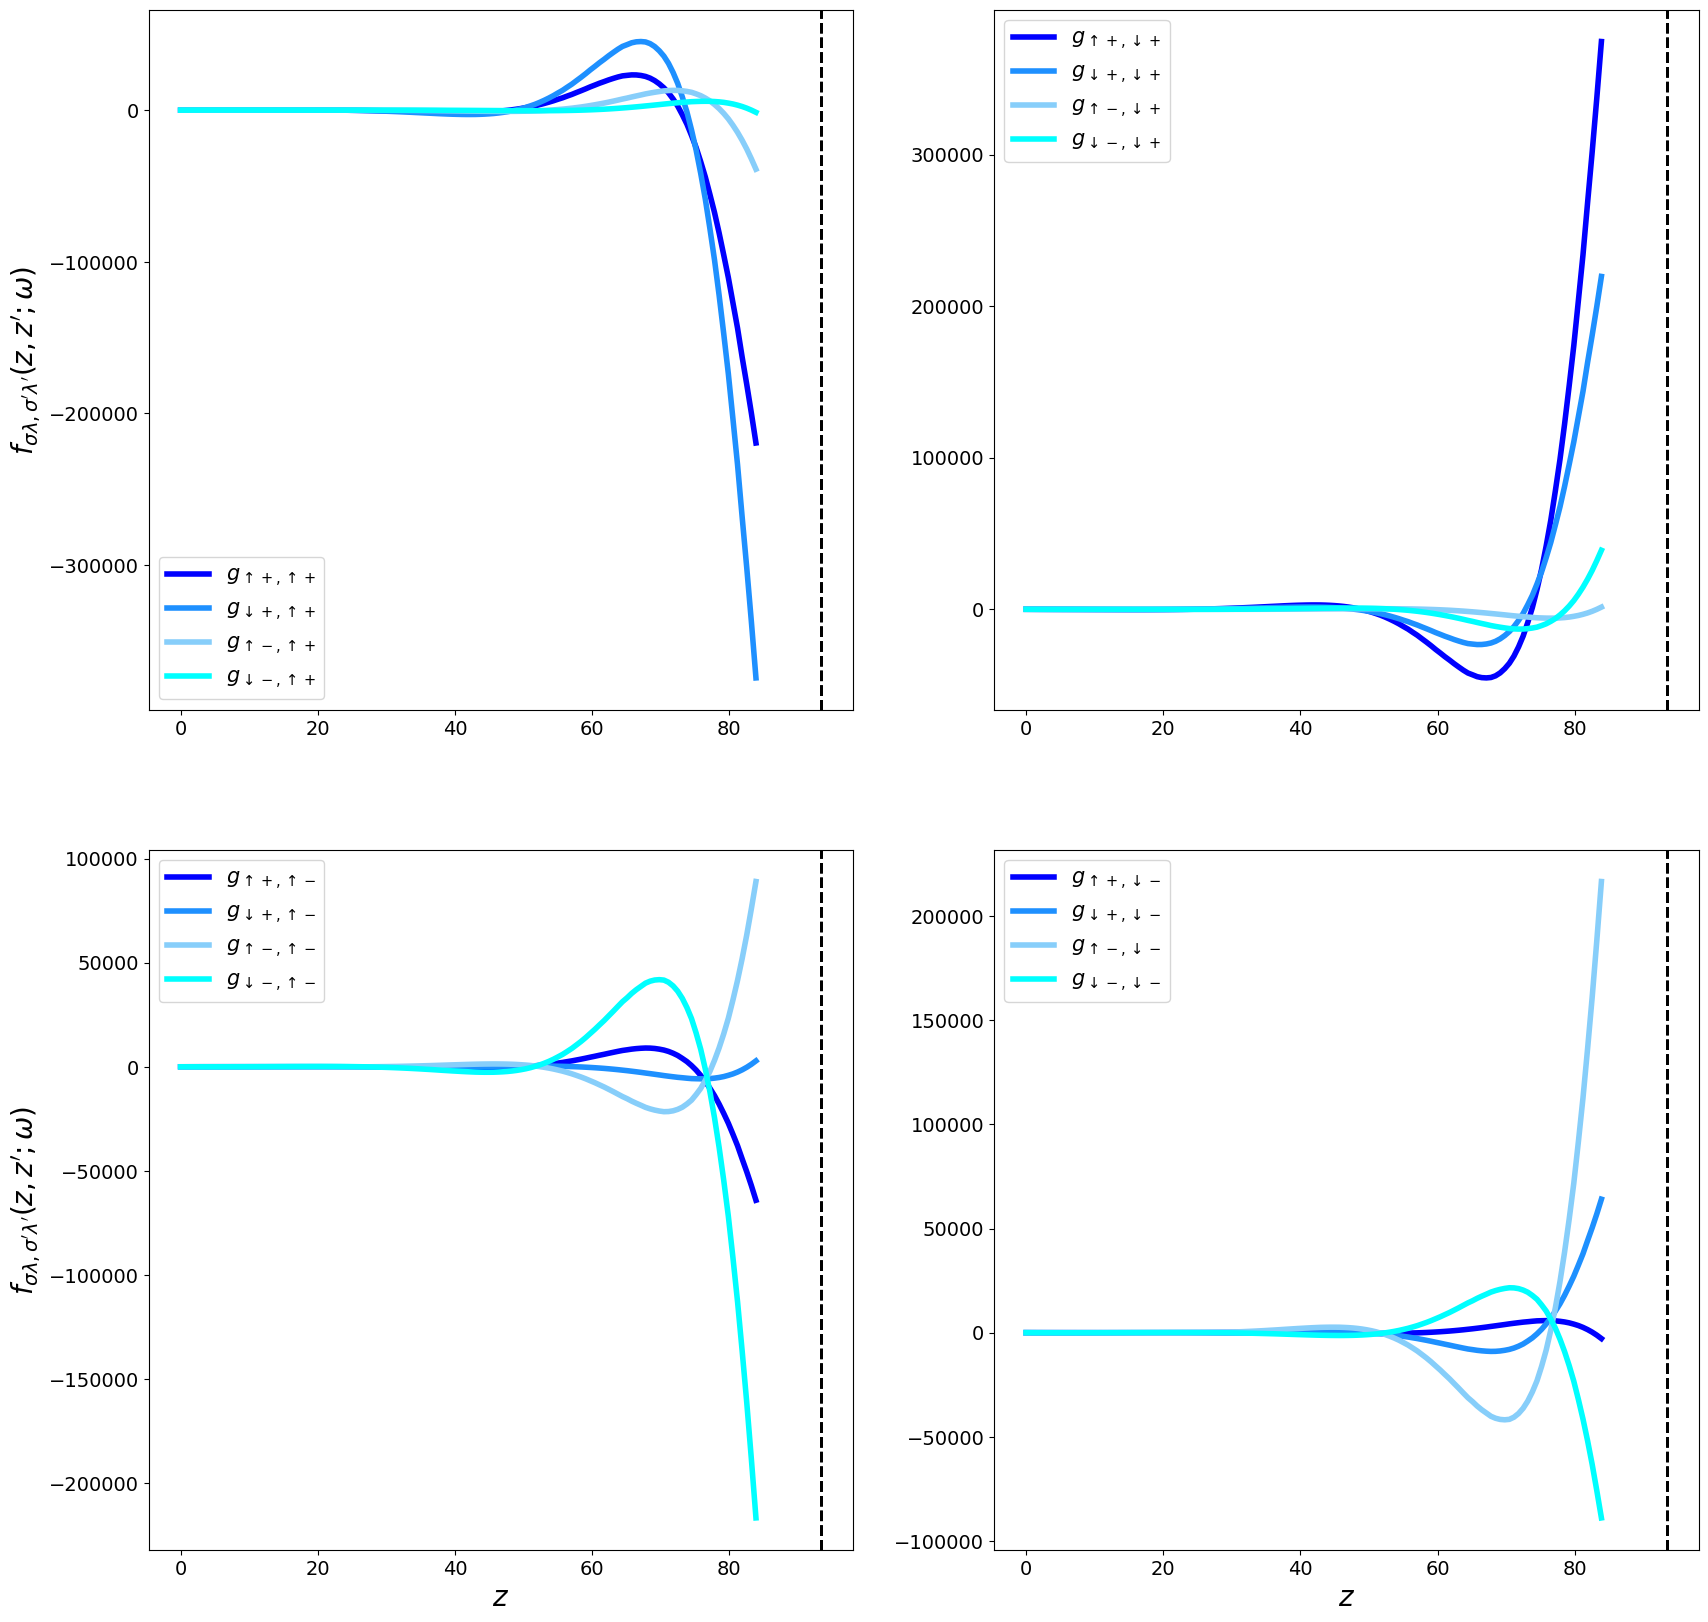

In [19]:
# select lattice
lattice = lattice2
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=93.4, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_Zfixed[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Green's Function for $z=87.2$

#### <font color='green'> **Real Part** </font> 

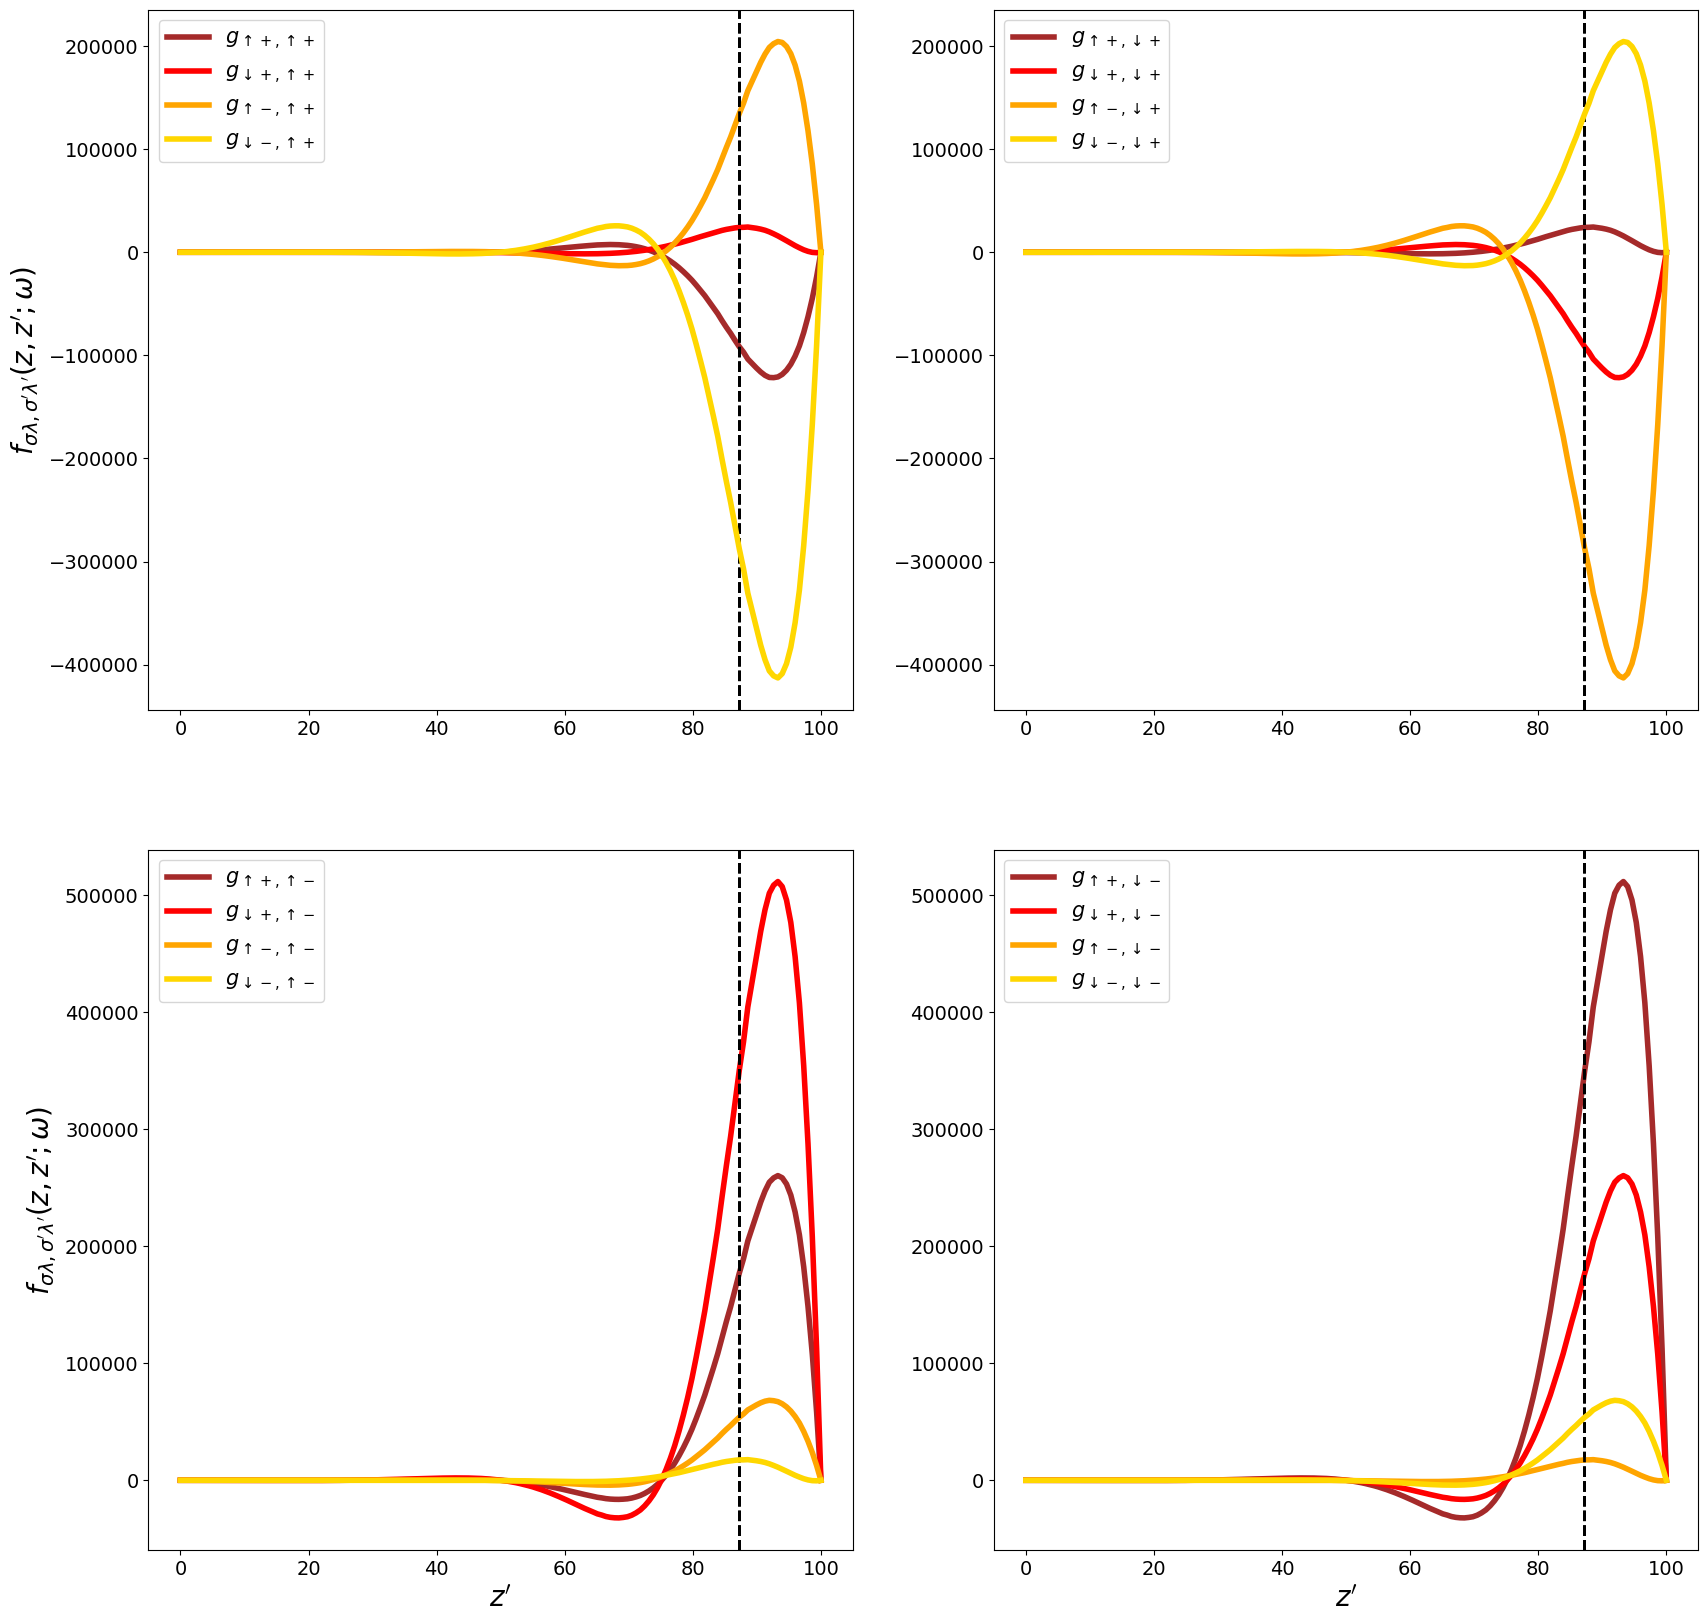

In [20]:
# select lattice
lattice = lattice3
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=87.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_zfixed[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

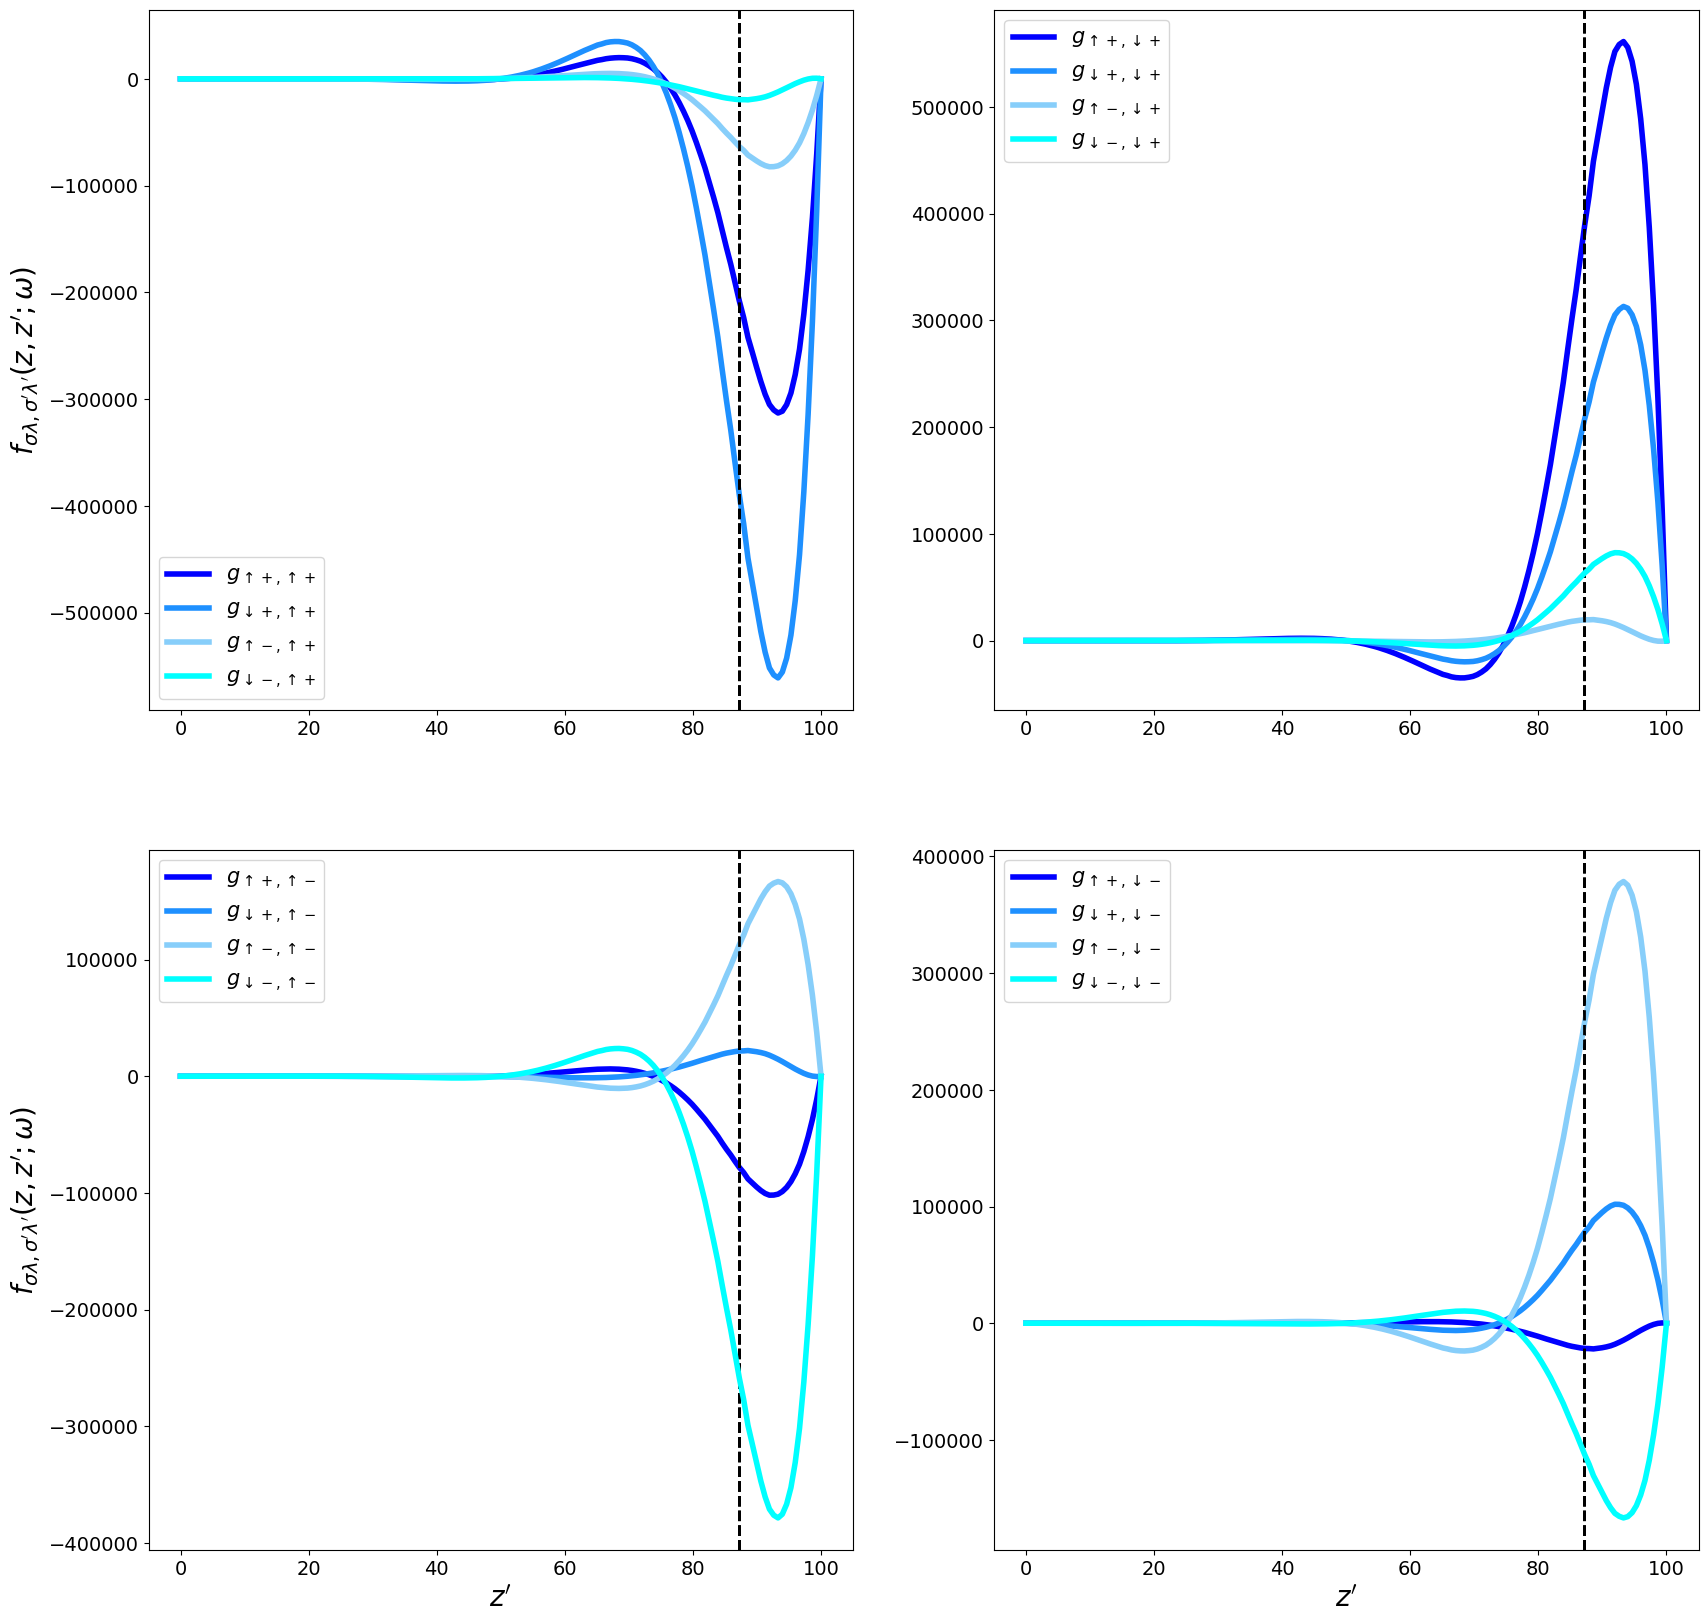

In [21]:
# select lattice
lattice = lattice3
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=87.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_zfixed[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Green's Function for $N_{sample}=10 000$

Below we test the solution for the anomalous Green's function with importance sampling and $N_{sample}=10000$.

#### <font color='green'> **Real Part** </font> 

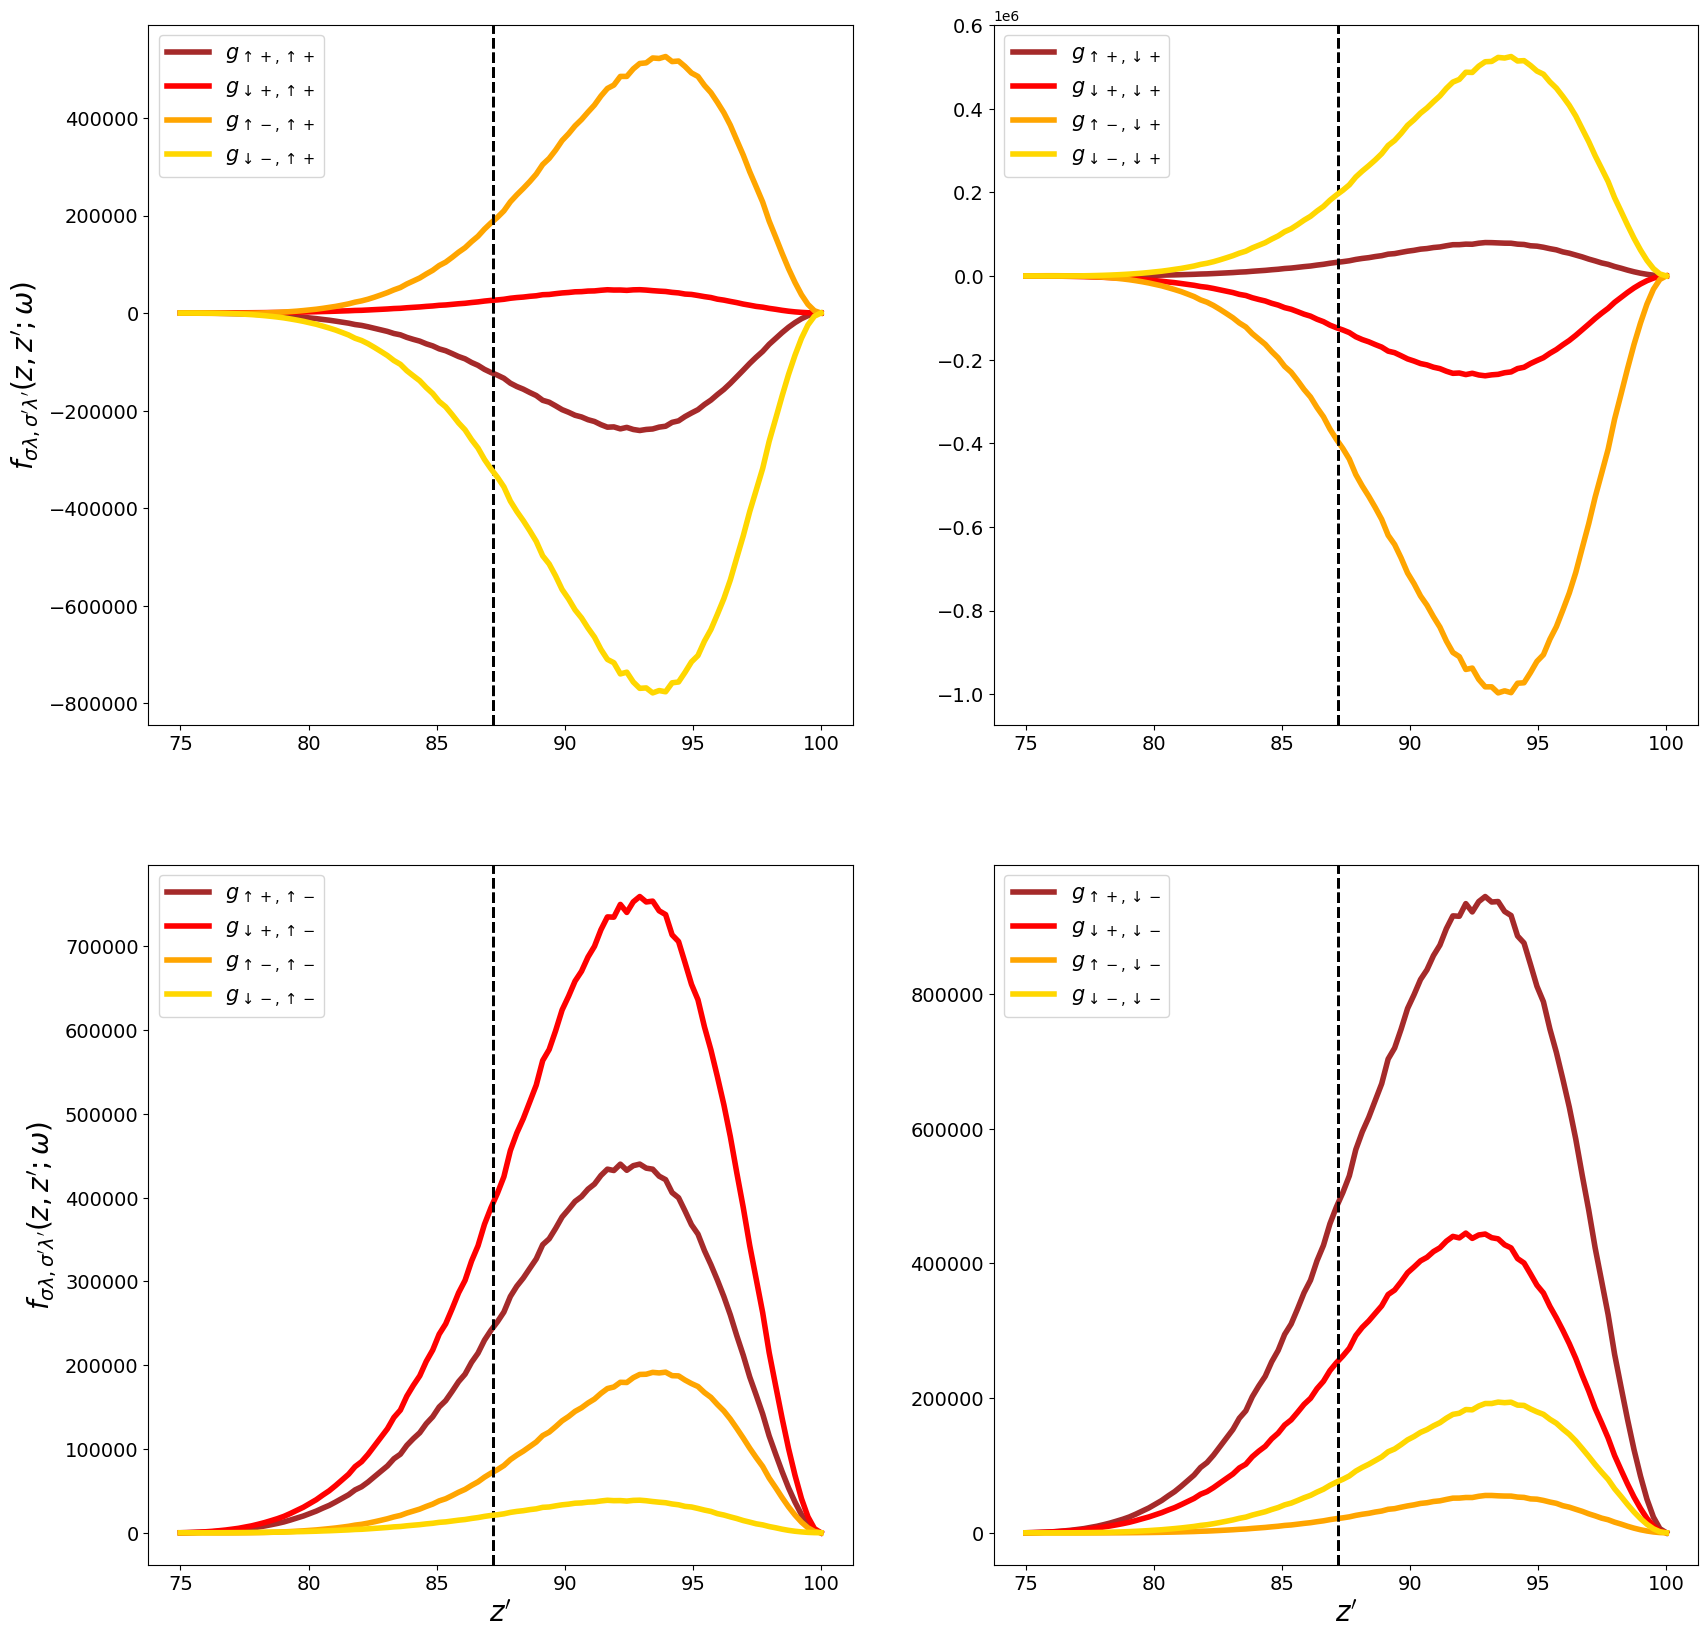

In [25]:
# F2 with z=z'
lattice, F2_test = Read_GreenFunction('F2-zZ.out')

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=87.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_test[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);


#### <font color='green'> **Imaginary Part** </font> 

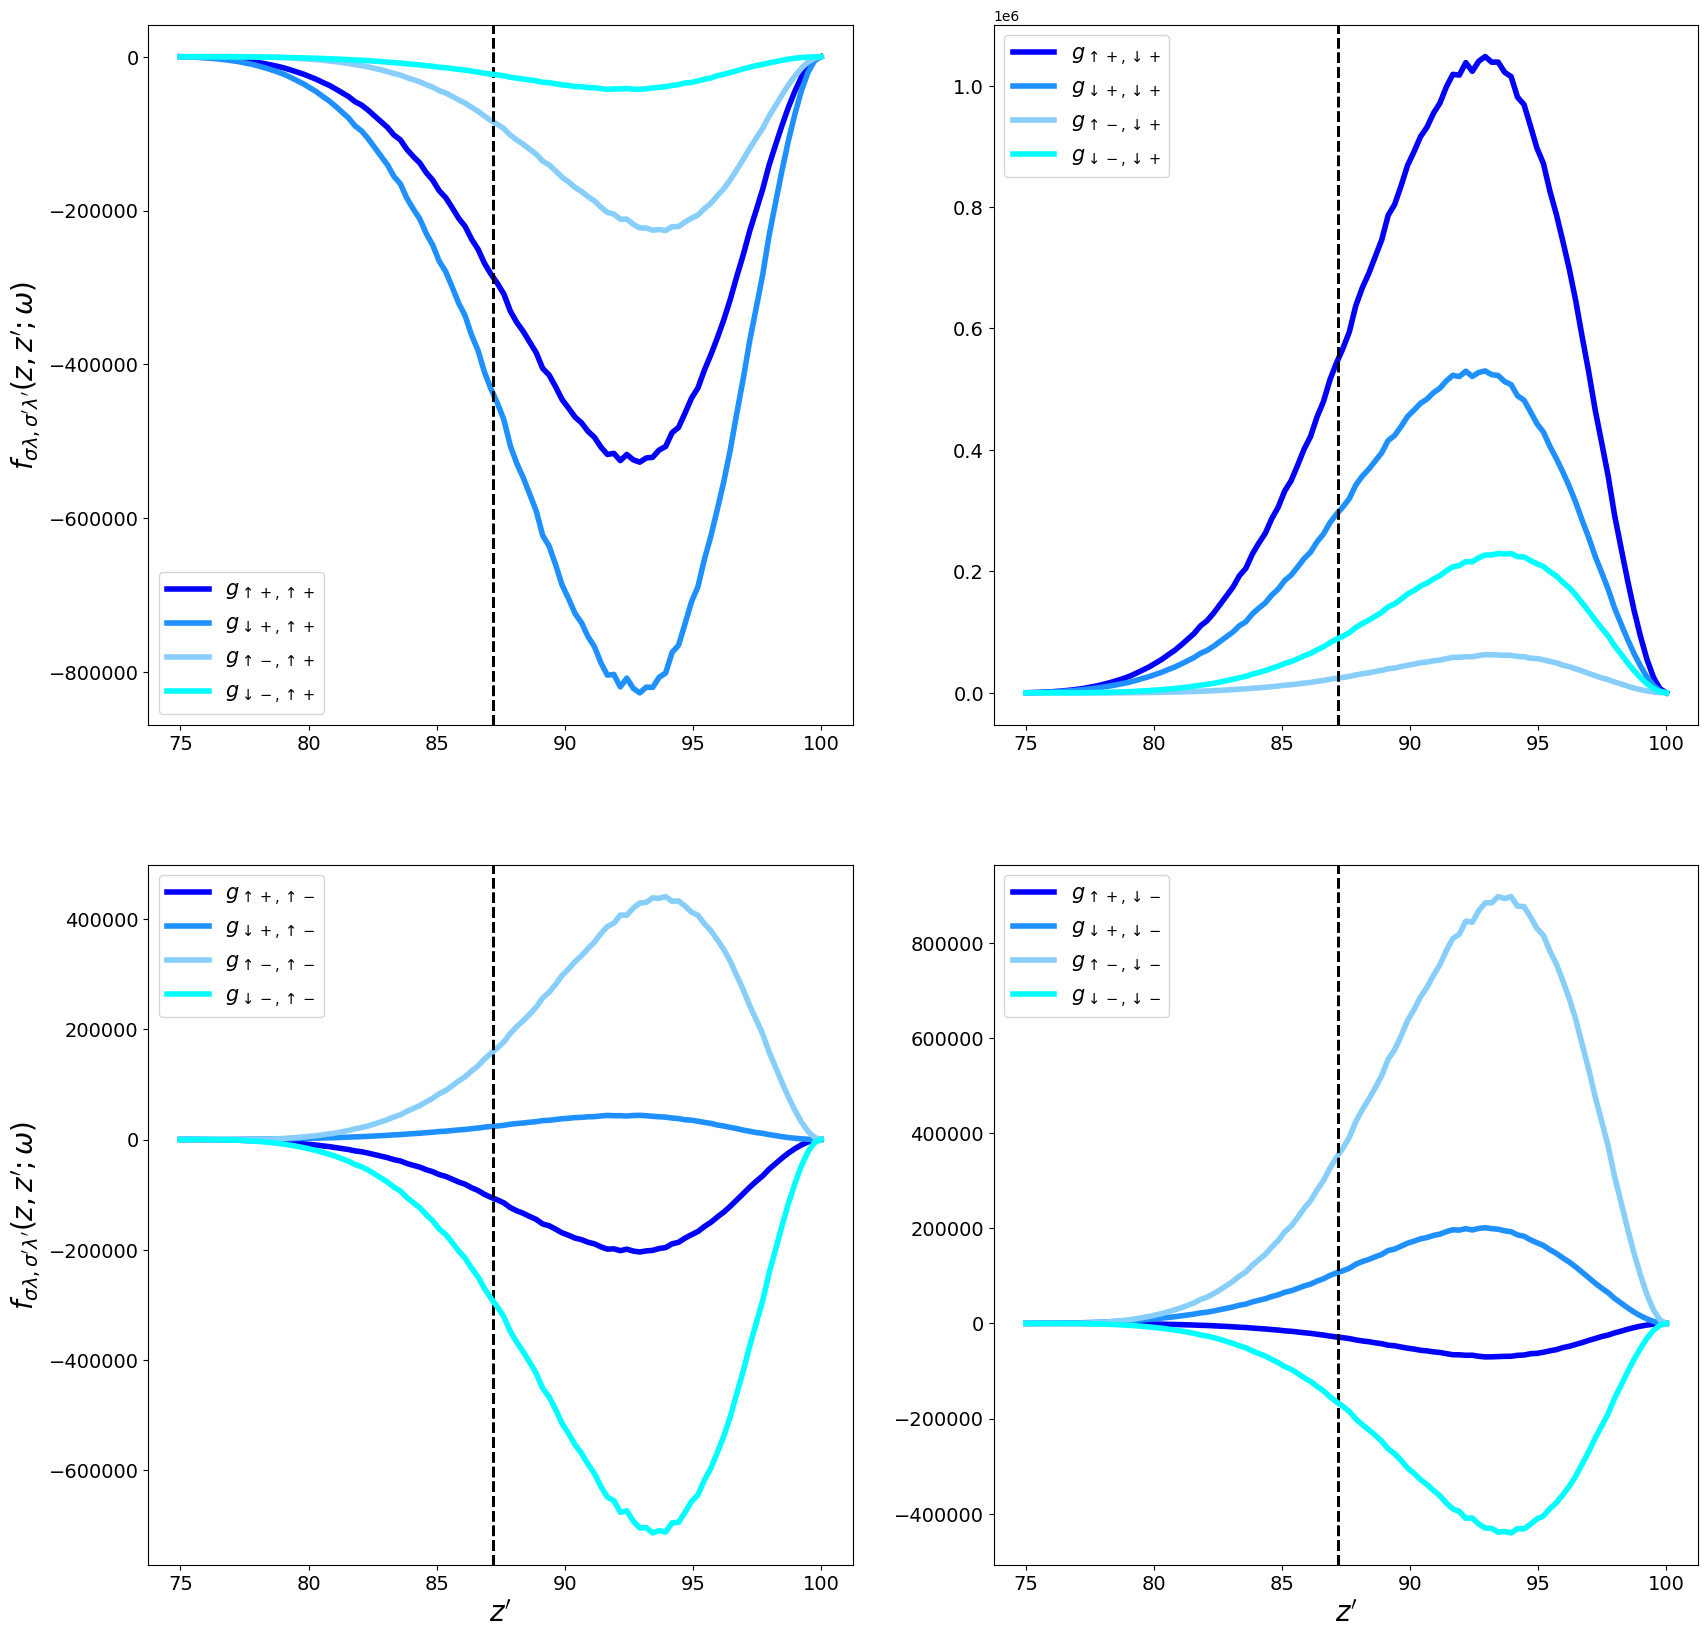

In [27]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # vertical line at z=z'
        axs[iPic][jPic].axvline(x=87.2, ls='--', color='black', lw=2)
        # plot the MC integral
        axs[iPic][jPic].plot(lattice, [F2_test[idx][irow][icol].imag for idx in range(len(lattice))], c=colors[irow], lw=4, label=labels[irow][icol])

    
    if iPic == 1: 
        axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    
    if jPic == 0:
        axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## **Integrand Function**

We plot below the integrand function to check that the function is well-defined.

#### <font color='green'> **Surface Plot** </font> 

In [22]:
'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# parameters
d = 100.; kx = 0.002; ky = 0.006; L = 0.; lT = 0.05*d; gamma = 0.001
# energies
mu = 0.010; Delta = 0.005; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])


# Define the function to plot
def f(x, y):
    return G2_integrand(x, y, d=d, z=81, Z=92, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT)[0][0]

n = 50
# Create a meshgrid for the surface
x = np.linspace(85, 100, n)
y = np.linspace(85, 100, n)
X, Y = np.meshgrid(x, y)

Z = np.empty((n,n), dtype='float')
for i in range(n):
    for j in range(n):
        
        x = X[i][j]; y = Y[i][j]
        
        Z[i][j] = f(x,y).real

# Create the figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add a color bar and labels
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_title('3D Surface Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\n# parameters\nd = 100.; kx = 0.002; ky = 0.006; L = 0.; lT = 0.05*d; gamma = 0.001\n# energies\nmu = 0.010; Delta = 0.005; omega = 0.0025\n# coupling matrices\nGamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])\n\n\n# Define the function to plot\ndef f(x, y):\n    return G2_integrand(x, y, d=d, z=81, Z=92, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT)[0][0]\n\nn = 50\n# Create a meshgrid for the surface\nx = np.linspace(85, 100, n)\ny = np.linspace(85, 100, n)\nX, Y = np.meshgrid(x, y)\n\nZ = np.empty((n,n), dtype='float')\nfor i in range(n):\n    for j in range(n):\n        \n        x = X[i][j]; y = Y[i][j]\n        \n        Z[i][j] = f(x,y).real\n\n# Create the figure and 3D axes\nfig = plt.figure(figsize=(8, 6))\nax = fig.add_subplot(111, projection='3d')\n\n# Plot the surface\nsurf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')\n\n# Add a color bar and 

#### <font color='green'> **1D Plot** </font> 

In [23]:
'''
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; gamma = 0.001
# energies
mu = 0.010; Delta = 0.005; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])

# colors
cmap = plt.get_cmap('magma', 20); cmap2 = plt.get_cmap('winter', 20)
# figure 
fig,ax = plt.subplots(figsize=(12, 5))


V = np.linspace(85,100,100)

g2intg = lambda x: np.array([G2_integrand(z1=x, z2=v, d=d, z=50, Z=90, kx=kx, ky=ky, L=0., mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT)[1][3] for v in V])


for idx in range(10):
    x = 85.5 + float(idx)
    ax.plot(V, g2intg(x).real, lw=2, c=cmap(idx), label=x)
    ax.plot(V, g2intg(x).imag, lw=2, c=cmap2(idx), label=x)


plt.show()
'''

"\n# parameters\nd = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; gamma = 0.001\n# energies\nmu = 0.010; Delta = 0.005; omega = 0.0025\n# coupling matrices\nGamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])\n\n# colors\ncmap = plt.get_cmap('magma', 20); cmap2 = plt.get_cmap('winter', 20)\n# figure \nfig,ax = plt.subplots(figsize=(12, 5))\n\n\nV = np.linspace(85,100,100)\n\ng2intg = lambda x: np.array([G2_integrand(z1=x, z2=v, d=d, z=50, Z=90, kx=kx, ky=ky, L=0., mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, lT=lT)[1][3] for v in V])\n\n\nfor idx in range(10):\n    x = 85.5 + float(idx)\n    ax.plot(V, g2intg(x).real, lw=2, c=cmap(idx), label=x)\n    ax.plot(V, g2intg(x).imag, lw=2, c=cmap2(idx), label=x)\n\n\nplt.show()\n"